<a href="https://colab.research.google.com/github/BenRyan-8/APA_CA/blob/main/BERPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install openpyxl

In [6]:
import pandas as pd
import openpyxl

df = pd.read_excel('/content/drive/MyDrive/FourthYear/APA/BERPublicsearch.xlsx', nrows=100000)
df_copy=df.copy()

In [7]:
#for starting again
df=df_copy

In [8]:
df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'BerRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'CO2Rating',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'MPCDERValue',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'HSSupplSystemEff',
 'WHMainSystemEff',
 'WHEffAdjFactor',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'NoOfFluelessGasFires',
 'DraftLobby',
 'VentilationMethod',
 'FanPowerManuDeclaredValue',
 'HeatExchangerEff',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'PermeabilityTestResult',
 'TempAdjustment',
 'HeatSystemControlCat',
 'HeatSystemRespo

#Data Cleaning

In [9]:
cols_to_remove = [

    # DIRECT BER COMPONENTS
    "BerRating",
    "CO2Rating",

    # DELIVERED ENERGY FIELDS
    "DeliveredLightingEnergy",
    "DeliveredEnergyPumpsFans",
    "DeliveredEnergyMainWater",
    "DeliveredEnergyMainSpace",
    "DeliveredEnergySecondarySpace",
    "DeliveredEnergySupplementaryWater",
    "TotalDeliveredEnergy",

    # PRIMARY ENERGY FIELDS
    "PrimaryEnergyLighting",
    "PrimaryEnergyPumpsFans",
    "PrimaryEnergyMainWater",
    "PrimaryEnergyMainSpace",
    "PrimaryEnergySecondarySpace",
    "PrimaryEnergySupplementaryWater",

    # CO2 EMISSIONS FIELDS
    "CO2Lighting",
    "CO2PumpsFans",
    "CO2MainWater",
    "CO2MainSpace",
    "CO2SecondarySpace",
    "CO2SupplementaryWater",

    # DEAP COMPLIANCE & PERFORMANCE COEFFICIENTS
    "CPC",
    "EPC",
    "RER",
    "RenewEPnren",
    "RenewEPren",

    # HIGHLY DERIVED / SEMI-LEAKAGE FIELDS
    "LivingAreaPercent",

    # RENEWABLE ENERGY SUBCOMPONENT FIELDS
    # Renewable Energy 1
    "FirstEnergyTypeId",
    "FirstEnergyType_Description",
    "FirstEnerProdComment",
    "FirstEnerProdDelivered",
    "FirstPartLTotalContribution",
    "FirstEnerProdConvFactor",
    "FirstEnerProdCO2EmissionFactor",
    "FirstEnerConsumedComment",
    "FirstEnerConsumedDelivered",
    "FirstEnerConsumedConvFactor",
    "FirstEnerConsumedCO2EmissionFactor",

    # Renewable Energy 2
    "SecondEnergyTypeId",
    "SecondEnergyType_Description",
    "SecondEnerProdComment",
    "SecondEnerProdDelivered",
    "SecondPartLTotalContribution",
    "SecondEnerProdConvFactor",
    "SecondEnerProdCO2EmissionFactor",
    "SecondEnerConsumedComment",
    "SecondEnerConsumedDelivered",
    "SecondEnerConsumedConvFactor",
    "SecondEnerConsumedCO2EmissionFactor",

    # Renewable Energy 3
    "ThirdEnergyTypeId",
    "ThirdEnergyType_Description",
    "ThirdEnerProdComment",
    "ThirdEnerProdDelivered",
    "ThirdPartLTotalContribution",
    "ThirdEnerProdConvFactor",
    "ThirdEnerProdCO2EmissionFactor",
    "ThirdEnerConsumedComment",
    "ThirdEnerConsumedDelivered",
    "ThirdEnerConsumedConvFactor",
    "ThirdEnerConsumedCO2EmissionFactor",

    # GROUP HEATING SCHEME FIELDS
    "ChargingBasisHeatConsumed",
    "gsdHSSupplHeatFraction",
    "gsdHSSupplSystemEff",
    "DistLossFactor",
    "CHPUnitHeatFraction",
    "CHPSystemType",
    "CHPElecEff",
    "CHPHeatEff",
    "CHPFuelType",
    "SupplHSFuelTypeID",
    "gsdSHRenewableResources",
    "gsdWHRenewableResources",
    "SolarHeatFraction",
    "TotalPrimaryEnergyFact",
    "TotalCO2Emissions",

    # WALL-BY-WALL STRUCTURE FIELDS

    # First wall (GA → GG)
    "FirstWallType_Description",
    "FirstWallDescription",
    "FirstWallArea",
    "FirstWallUValue",
    "FirstWallIsSemiExposed",
    "FirstWallAgeBandId",
    "FirstWallTypeId",

    # Second wall (GH → GN)
    "SecondWallType_Description",
    "SecondWallDescription",
    "SecondWallArea",
    "SecondWallUValue",
    "SecondWallIsSemiExposed",
    "SecondWallAgeBandId",
    "SecondWallTypeId",

    # Third wall (GO → GU)
    "ThirdWallType_Description",
    "ThirdWallDescription",
    "ThirdWallArea",
    "ThirdWallUValue",
    "ThirdWallIsSemiExposed",
    "ThirdWallAgeBandId",
    "ThirdWallTypeId",

    # MISCELLANEOUS STRUCTURAL FIELDS
    "GroundFloorUValue",
    "LowEnergyLightingPercent",
    "PurposeOfRating",
    "DateOfAssessment",
    "VolumeOfPreHeatStore",

    # SPATIAL METADATA
    "SA_Code",
    "prob_smarea_error_0corr",
    "prob_smarea_error_100corr",

    # NEW — DEAP-DERIVED HEATING / CONTROL VARIABLES (MUST REMOVE)
    "HSSupplSystemEff",
    "WHMainSystemEff",
    "WHEffAdjFactor",
    "TempAdjustment",
    "HeatSystemControlCat",
    "HeatSystemResponseCat",
    "TempFactorUnadj",
    "TempFactorMultiplier",
    "PrimaryCircuitLoss",
    "CombiBoilerAddLoss",
    "MPCDERValue"
]


In [10]:
df.drop(columns=cols_to_remove, inplace=True)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum() / len(df) * 100

# Filter out columns with no missing data if desired, or sort for better visualization
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)


Heatmap overview of missing data

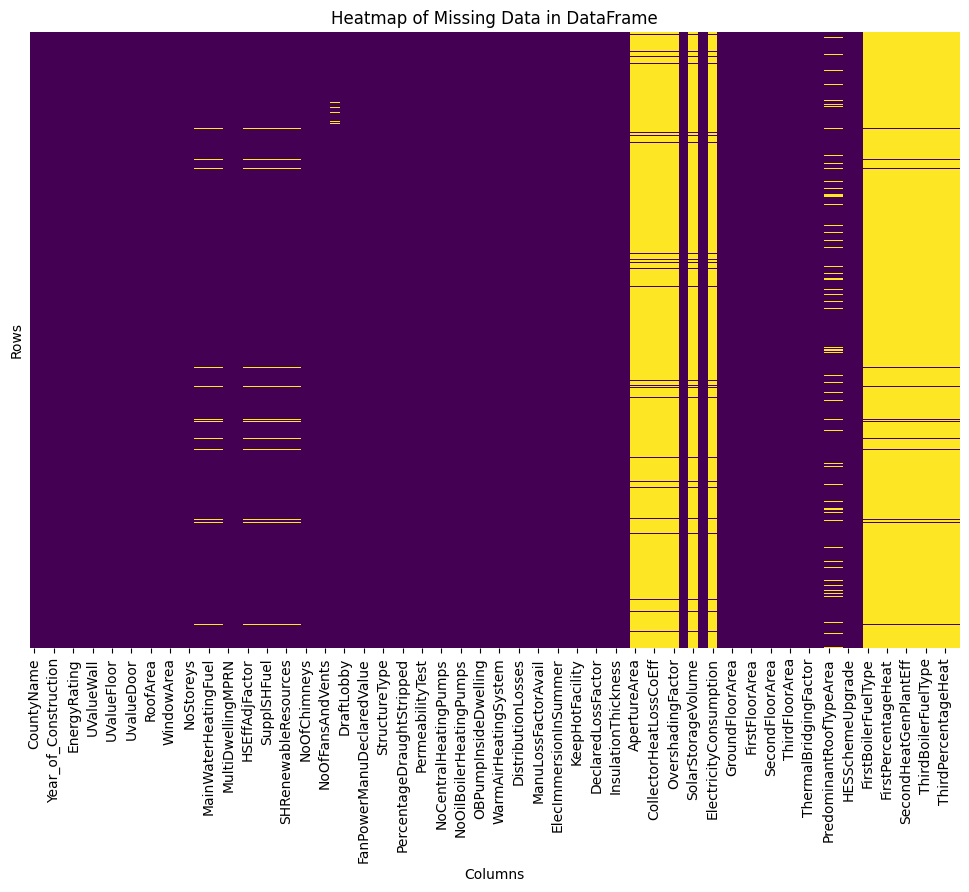

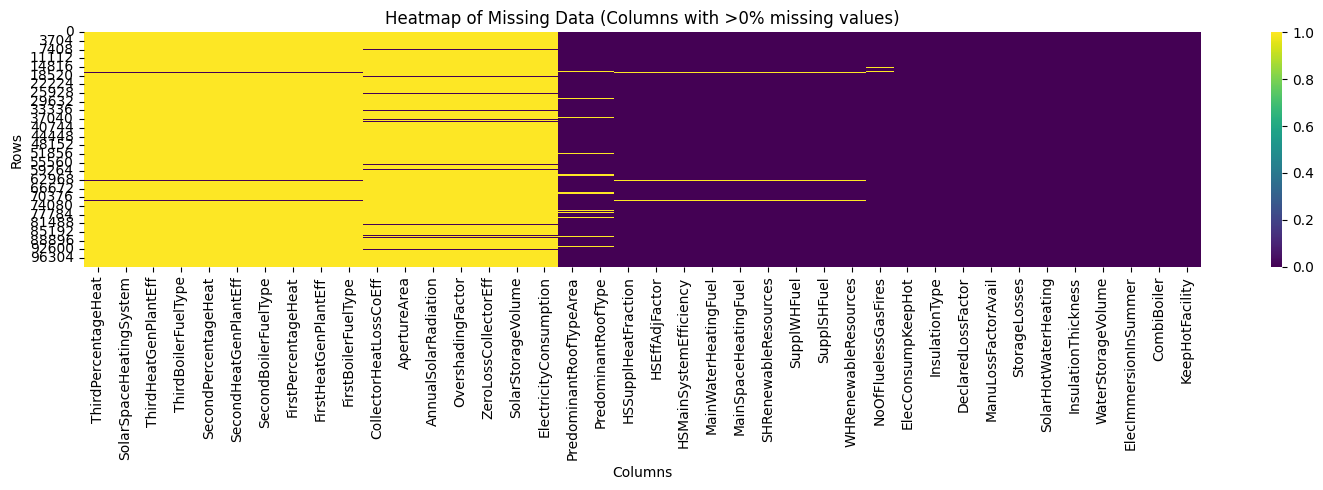

In [12]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=False # Hide yticklabels as it's hard to read for large DFs
)
plt.title('Heatmap of Missing Data in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# A more detailed heatmap of only columns with missing values (if `missing_data` Series is not empty)
if not missing_data.empty:
    plt.figure(figsize=(15, 5))
    sns.heatmap(
        df[missing_data.index].isnull(),
        cbar=True,
        cmap='viridis'
    )
    plt.title('Heatmap of Missing Data (Columns with >0% missing values)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to display a detailed heatmap.")


In [13]:
threshold = 0.9

# Identify columns with > 90% missing
cols_over_90_missing = df.columns[df.isna().mean() > threshold].tolist()

print("Columns with >90% missing:", cols_over_90_missing)
cols_over_90_missing

Columns with >90% missing: ['ApertureArea', 'ZeroLossCollectorEff', 'CollectorHeatLossCoEff', 'AnnualSolarRadiation', 'OvershadingFactor', 'SolarStorageVolume', 'ElectricityConsumption', 'FirstBoilerFuelType', 'FirstHeatGenPlantEff', 'FirstPercentageHeat', 'SecondBoilerFuelType', 'SecondHeatGenPlantEff', 'SecondPercentageHeat', 'ThirdBoilerFuelType', 'ThirdHeatGenPlantEff', 'ThirdPercentageHeat', 'SolarSpaceHeatingSystem']


['ApertureArea',
 'ZeroLossCollectorEff',
 'CollectorHeatLossCoEff',
 'AnnualSolarRadiation',
 'OvershadingFactor',
 'SolarStorageVolume',
 'ElectricityConsumption',
 'FirstBoilerFuelType',
 'FirstHeatGenPlantEff',
 'FirstPercentageHeat',
 'SecondBoilerFuelType',
 'SecondHeatGenPlantEff',
 'SecondPercentageHeat',
 'ThirdBoilerFuelType',
 'ThirdHeatGenPlantEff',
 'ThirdPercentageHeat',
 'SolarSpaceHeatingSystem']

In [14]:
# Filter the missing_data Series to include only columns identified as having >90% missing
missing_data_over_90 = missing_data[missing_data.index.isin(cols_over_90_missing)]

print("Columns with over 90% missing data and their percentages:")
display(missing_data_over_90.sort_values(ascending=False))


Columns with over 90% missing data and their percentages:


,0
ThirdPercentageHeat,98.673
SolarSpaceHeatingSystem,98.673
ThirdHeatGenPlantEff,98.673
ThirdBoilerFuelType,98.673
SecondPercentageHeat,98.673
SecondHeatGenPlantEff,98.673
SecondBoilerFuelType,98.673
FirstPercentageHeat,98.673
FirstHeatGenPlantEff,98.673
FirstBoilerFuelType,98.673


In [15]:
# Drop them
df.drop(columns=cols_over_90_missing, inplace=True)

dropping columns that only contain one value as it doesn't provide any value to the model

In [16]:
cols_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        cols_to_drop_single_value.append(col)

if cols_to_drop_single_value:
    print(f"Dropping {len(cols_to_drop_single_value)} columns with only one unique value: {cols_to_drop_single_value}")
    df.drop(columns=cols_to_drop_single_value, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with only one unique value.")

# Display the shape of the DataFrame after dropping columns
print(f"New DataFrame shape: {df.shape}")

No columns found with only one unique value.
New DataFrame shape: (100000, 79)


Checking for how rare the A ratings are and then grouping them into just A

In [17]:
df["EnergyRating"].value_counts().sort_index()


,count
EnergyRating,
A1,1
A2,213
A3,1794
B1,1307
B2,2244
B3,6288
C1,10671
C2,12950
C3,13023


In [18]:
df["EnergyRating"] = df["EnergyRating"].replace({"A1":"A", "A2":"A", "A3":"A"})

In [19]:
# Remove leading/trailing whitespace and uppercase just in case
df["EnergyRating"] = df["EnergyRating"].astype(str).str.strip().str.upper()


In [20]:
# Remove leading/trailing whitespace from all object (string) columns in the DataFrame
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

print("Removed leading/trailing whitespace from all string columns in the DataFrame.")

Removed leading/trailing whitespace from all string columns in the DataFrame.


In [21]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print(f"Number of duplicate rows dropped: {initial_rows - final_rows}")

Number of duplicate rows dropped: 2579


#Imputation

In [22]:
import numpy as np

# Identify column types automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [23]:
numeric_cols, categorical_cols

(['Year_of_Construction',
  'GroundFloorArea(sq m)',
  'UValueWall',
  'UValueRoof',
  'UValueFloor',
  'UValueWindow',
  'UvalueDoor',
  'WallArea',
  'RoofArea',
  'FloorArea',
  'WindowArea',
  'DoorArea',
  'NoStoreys',
  'HSMainSystemEfficiency',
  'TGDLEdition',
  'HSEffAdjFactor',
  'HSSupplHeatFraction',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'NoOfChimneys',
  'NoOfOpenFlues',
  'NoOfFansAndVents',
  'NoOfFluelessGasFires',
  'FanPowerManuDeclaredValue',
  'HeatExchangerEff',
  'PercentageDraughtStripped',
  'NoOfSidesSheltered',
  'PermeabilityTestResult',
  'NoCentralHeatingPumps',
  'NoOilBoilerHeatingPumps',
  'NoGasBoilerHeatingPumps',
  'DistributionLosses',
  'WaterStorageVolume',
  'DeclaredLossFactor',
  'InsulationThickness',
  'ElecConsumpKeepHot',
  'GroundFloorArea',
  'GroundFloorHeight',
  'FirstFloorArea',
  'FirstFloorHeight',
  'SecondFloorArea',
  'SecondFloorHeight',
  'ThirdFloorArea',
  'ThirdFloorHeight',
 

##Numerical Imputation

In [24]:

numerical_but_categorical = [
    "TGDLEdition",
    "ThermalMassCategory",
    "PredominantRoofType",
    'SupplSHFuel',
    'SupplWHFuel',
    'SHRenewableResources',
    'WHRenewableResources',
    'HESSchemeUpgrade'
]

# Move overrides into categorical
for col in numerical_but_categorical:
    if col in numeric_cols:
        numeric_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

df[numerical_but_categorical] = df[numerical_but_categorical].astype("str")


In [25]:
zero_counts = {}
# Filter for numerical columns
numeric_df = df.select_dtypes(include=['number'])

for col in numeric_df.columns:
    count = (numeric_df[col] == 0).sum()
    if count > 0:
        zero_counts[col] = count

if zero_counts:
    print("Number of 0's contained in each numerical column:")
    for col, count in zero_counts.items():
        print(f"Column '{col}': {count} zeros")
else:
    print("No numerical columns contain the value 0.")

Number of 0's contained in each numerical column:
Column 'UValueWall': 14 zeros
Column 'UValueRoof': 8892 zeros
Column 'UValueFloor': 10035 zeros
Column 'UValueWindow': 21 zeros
Column 'UvalueDoor': 11112 zeros
Column 'WallArea': 14 zeros
Column 'RoofArea': 8891 zeros
Column 'FloorArea': 10034 zeros
Column 'WindowArea': 21 zeros
Column 'DoorArea': 11116 zeros
Column 'HSSupplHeatFraction': 12840 zeros
Column 'NoOfChimneys': 39096 zeros
Column 'NoOfOpenFlues': 65324 zeros
Column 'NoOfFansAndVents': 14204 zeros
Column 'NoOfFluelessGasFires': 95732 zeros
Column 'FanPowerManuDeclaredValue': 96153 zeros
Column 'HeatExchangerEff': 96161 zeros
Column 'PercentageDraughtStripped': 4045 zeros
Column 'NoOfSidesSheltered': 6077 zeros
Column 'PermeabilityTestResult': 94507 zeros
Column 'NoCentralHeatingPumps': 14815 zeros
Column 'NoOilBoilerHeatingPumps': 59154 zeros
Column 'NoGasBoilerHeatingPumps': 60499 zeros
Column 'DistributionLosses': 2894 zeros
Column 'WaterStorageVolume': 4933 zeros
Column '

In [26]:
total_rows = len(df)

# Filter for columns that have more than 90% zeros
zero_percentage_threshold = 0.9

cols_with_high_zeros = {}
for col, count in zero_counts.items():
    percentage = count / total_rows
    if percentage > zero_percentage_threshold:
        cols_with_high_zeros[col] = percentage

if cols_with_high_zeros:
    print(f"Columns with more than {zero_percentage_threshold * 100}% zeros:")
    for col, percentage in cols_with_high_zeros.items():
        print(f"- Column '{col}': {percentage:.2%} zeros")
else:
    print(f"No numerical columns found with more than {zero_percentage_threshold * 100}% zeros.")

Columns with more than 90.0% zeros:
- Column 'NoOfFluelessGasFires': 98.27% zeros
- Column 'FanPowerManuDeclaredValue': 98.70% zeros
- Column 'HeatExchangerEff': 98.71% zeros
- Column 'PermeabilityTestResult': 97.01% zeros
- Column 'DeclaredLossFactor': 96.92% zeros
- Column 'ElecConsumpKeepHot': 99.65% zeros
- Column 'SecondFloorArea': 95.42% zeros
- Column 'SecondFloorHeight': 95.43% zeros
- Column 'ThirdFloorArea': 98.04% zeros
- Column 'ThirdFloorHeight': 98.03% zeros
- Column 'RoomInRoofArea': 94.54% zeros


In [27]:
# Drop columns with more than 90% zeros
if cols_with_high_zeros:
    cols_to_drop_high_zeros = list(cols_with_high_zeros.keys())
    df.drop(columns=cols_to_drop_high_zeros, inplace=True)
    print(f"Dropped {len(cols_to_drop_high_zeros)} columns with >90% zeros: {cols_to_drop_high_zeros}")
else:
    print("No columns with >90% zeros to drop.")

print(f"New DataFrame shape: {df.shape}")

Dropped 11 columns with >90% zeros: ['NoOfFluelessGasFires', 'FanPowerManuDeclaredValue', 'HeatExchangerEff', 'PermeabilityTestResult', 'DeclaredLossFactor', 'ElecConsumpKeepHot', 'SecondFloorArea', 'SecondFloorHeight', 'ThirdFloorArea', 'ThirdFloorHeight', 'RoomInRoofArea']
New DataFrame shape: (97421, 68)


In [28]:
# Remove columns that were dropped due to high zero percentage from the numeric_cols list
numeric_cols = [col for col in numeric_cols if col not in cols_to_drop_high_zeros]
print("Updated numeric_cols:")
print(numeric_cols)

Updated numeric_cols:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'InsulationThickness', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'ThermalBridgingFactor', 'PredominantRoofTypeArea']


In [29]:
print("Columns subject to median imputation:")
print(numeric_cols)

print("\nMissing values in these columns before imputation:")
print(df[numeric_cols].isnull().sum())

Columns subject to median imputation:
['Year_of_Construction', 'GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor', 'UValueWindow', 'UvalueDoor', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'NoStoreys', 'HSMainSystemEfficiency', 'HSEffAdjFactor', 'HSSupplHeatFraction', 'NoOfChimneys', 'NoOfOpenFlues', 'NoOfFansAndVents', 'PercentageDraughtStripped', 'NoOfSidesSheltered', 'NoCentralHeatingPumps', 'NoOilBoilerHeatingPumps', 'NoGasBoilerHeatingPumps', 'DistributionLosses', 'WaterStorageVolume', 'InsulationThickness', 'GroundFloorArea', 'GroundFloorHeight', 'FirstFloorArea', 'FirstFloorHeight', 'ThermalBridgingFactor', 'PredominantRoofTypeArea']

Missing values in these columns before imputation:
Year_of_Construction            0
GroundFloorArea(sq m)           0
UValueWall                      0
UValueRoof                      0
UValueFloor                     0
UValueWindow                    0
UvalueDoor                      0
WallArea                  

Descriptive Statistics for PredominantRoofTypeArea:
count    88530.000000
mean        61.870798
std         36.822033
min          0.010000
25%         40.010000
50%         50.300000
75%         73.780000
max        820.000000
Name: PredominantRoofTypeArea, dtype: float64


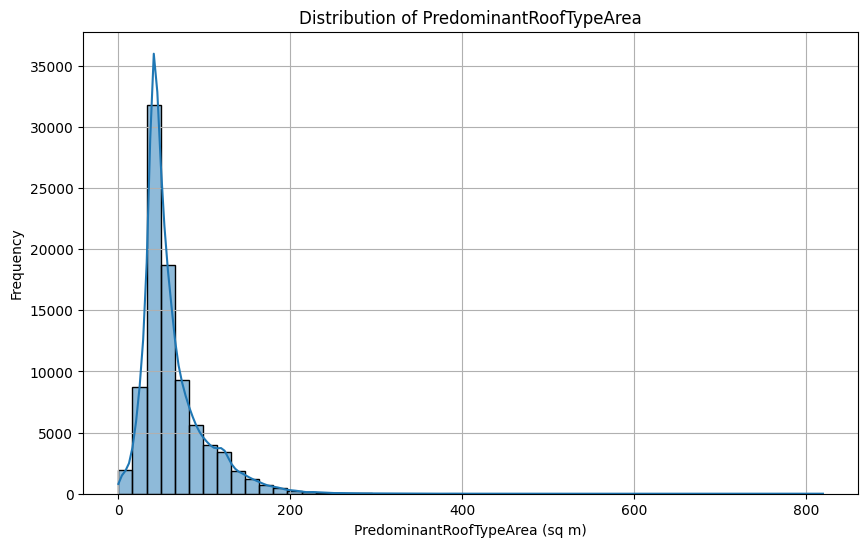

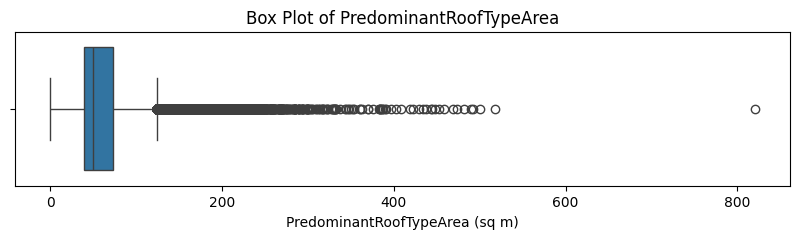

In [30]:
# Get the 'PredominantRoofTypeArea' column from the DataFrame
roof_area = df['PredominantRoofTypeArea']

# Display descriptive statistics
print("Descriptive Statistics for PredominantRoofTypeArea:")
print(roof_area.describe())

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(roof_area, kde=True, bins=50)
plt.title('Distribution of PredominantRoofTypeArea')
plt.xlabel('PredominantRoofTypeArea (sq m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Optionally, a box plot to see outliers and quartiles more clearly
plt.figure(figsize=(10, 2))
sns.boxplot(x=roof_area)
plt.title('Box Plot of PredominantRoofTypeArea')
plt.xlabel('PredominantRoofTypeArea (sq m)')
plt.show()

In [31]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")

df[numeric_cols] = median_imputer.fit_transform(df[numeric_cols])

##Categorical Imputation

In [32]:
def inspect_no_none_usage(df, categorical_cols):
    results = []

    for col in categorical_cols:
        uniques = df[col].dropna().unique()

        uses_no = any(
            str(v).strip().lower() == "no" for v in uniques
        )
        uses_none = any(
            str(v).strip().lower() == "none" for v in uniques
        )

        if uses_no or uses_none:
            results.append({
                "column": col,
                "uses_No": uses_no,
                "uses_None": uses_none,
                "unique_values": uniques
            })

    return pd.DataFrame(results)

# Run it
usage_df = inspect_no_none_usage(df, categorical_cols)

usage_df


,column,uses_No,uses_None,unique_values
0,MultiDwellingMPRN,True,False,"[NO, YES]"
1,DraftLobby,True,False,"[NO, YES]"
2,SuspendedWoodenFloor,True,False,"[No, Yes (Sealed), Yes (Unsealed)]"
3,PermeabilityTest,True,False,"[NO, YES]"
4,CHBoilerThermostatControlled,True,False,"[YES, NO]"
5,OBBoilerThermostatControlled,True,False,"[YES, NO]"
6,OBPumpInsideDwelling,True,False,"[NO, YES]"
7,WarmAirHeatingSystem,True,False,"[NO, YES]"
8,UndergroundHeating,True,False,"[NO, YES]"
9,StorageLosses,True,False,"[YES, NO, nan]"


In [33]:
impute_no = []
impute_none = []
impute_unknown = []

for col in categorical_cols:
    uniques = df[col].dropna().unique()
    lower_uniques = [str(u).strip().lower() for u in uniques]

    uses_no = "no" in lower_uniques
    uses_none = "none" in lower_uniques

    if uses_no and not uses_none:
        impute_no.append(col)
    elif uses_none and not uses_no:
        impute_none.append(col)
    else:
        impute_unknown.append(col)


In [34]:
impute_no, impute_none, impute_unknown

(['MultiDwellingMPRN',
  'DraftLobby',
  'SuspendedWoodenFloor',
  'PermeabilityTest',
  'CHBoilerThermostatControlled',
  'OBBoilerThermostatControlled',
  'OBPumpInsideDwelling',
  'WarmAirHeatingSystem',
  'UndergroundHeating',
  'StorageLosses',
  'ManuLossFactorAvail',
  'SolarHotWaterHeating',
  'ElecImmersionInSummer',
  'CylinderStat',
  'CombinedCylinder',
  'SWHPumpSolarPowered'],
 ['CombiBoiler', 'KeepHotFacility', 'InsulationType'],
 ['CountyName',
  'DwellingTypeDescr',
  'TypeofRating',
  'EnergyRating',
  'MainSpaceHeatingFuel',
  'MainWaterHeatingFuel',
  'VentilationMethod',
  'StructureType',
  'ThermalMassCategory',
  'PredominantRoofType',
  'TGDLEdition',
  'SupplSHFuel',
  'SupplWHFuel',
  'SHRenewableResources',
  'WHRenewableResources',
  'HESSchemeUpgrade'])

In [35]:
logical_zero_cols = [
    'HSSupplHeatFraction',
    'HSSupplSystemEff',
    'FanPowerManuDeclaredValue',
    'HeatExchangerEff'
]

for col in logical_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


In [36]:
df[impute_no] = df[impute_no].fillna("NO")
df[impute_none] = df[impute_none].fillna("None")
df[impute_unknown] = df[impute_unknown].fillna("Unknown")

Removing rows that don't contain an energy rating

In [37]:
original_len = len(df)
df = df[df["EnergyRating"] != "Unknown"]
new_len = len(df)

print(f"Removed {original_len - new_len} rows with unknown EnergyRating.")


Removed 0 rows with unknown EnergyRating.


In [38]:
df.isna().sum().sum()


np.int64(0)

In [39]:
df_clean = df.copy()
df_target = df["EnergyRating"]

In [40]:
df["CountyName"] = df["CountyName"].replace(
    to_replace=r".*Dublin.*",
    value="Co. Dublin",
    regex=True
)


In [41]:
tree_df = df.copy()
logreg_df = df.copy()

logreg_df.drop(columns=["EnergyRating"], inplace=True)

print("Tree-based dataset shape:", tree_df.shape)
tree_df.head()


Tree-based dataset shape: (97421, 68)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,...,SWHPumpSolarPowered,GroundFloorArea,GroundFloorHeight,FirstFloorArea,FirstFloorHeight,ThermalBridgingFactor,ThermalMassCategory,PredominantRoofTypeArea,PredominantRoofType,HESSchemeUpgrade
0,Co. Wexford,Detached house,2000.0,Existing,B3,233.78,0.28,0.23,0.41,2.71,...,NO,136.49,2.15,97.29,2.40,0.15,Medium,87.456,Pitch Roof-Insul.on Ceiling,1
1,Galway City,Semi-detached house,1982.0,Existing,C2,108.58,0.27,0.13,0.57,1.34,...,NO,54.29,2.40,54.29,2.70,0.15,Medium,54.290,Pitch Roof-Insul.on Ceiling,1
2,Co. Galway,Top-floor apartment,2002.0,Existing,C3,72.38,0.27,0.13,0.00,2.70,...,NO,72.38,2.50,0.00,0.00,0.15,Medium-low,72.380,Pitch Roof-Insul.on Ceiling,1
4,Co. Galway,Top-floor apartment,2002.0,Existing,D1,60.30,0.27,0.13,0.00,2.70,...,NO,60.30,2.45,0.00,0.00,0.15,Medium-low,60.300,Pitch Roof-Insul.on Ceiling,1
5,Co. Cork,Semi-detached house,1977.0,Existing,C3,123.70,0.42,0.13,0.84,2.86,...,NO,60.59,2.47,63.11,2.66,0.15,Medium,63.110,Pitch Roof-Insul.on Ceiling,1


In [42]:
tree_df.columns.tolist()

['CountyName',
 'DwellingTypeDescr',
 'Year_of_Construction',
 'TypeofRating',
 'EnergyRating',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'MainSpaceHeatingFuel',
 'MainWaterHeatingFuel',
 'HSMainSystemEfficiency',
 'MultiDwellingMPRN',
 'TGDLEdition',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'SupplSHFuel',
 'SupplWHFuel',
 'SHRenewableResources',
 'WHRenewableResources',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'DraftLobby',
 'VentilationMethod',
 'StructureType',
 'SuspendedWoodenFloor',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'PermeabilityTest',
 'NoCentralHeatingPumps',
 'CHBoilerThermostatControlled',
 'NoOilBoilerHeatingPumps',
 'OBBoilerThermostatControlled',
 'OBPumpInsideDwelling',
 'NoGasBoilerHeatingPumps',
 'WarmAirHeatingSystem',
 'UndergroundHeating',
 'DistributionLosses',
 'StorageLosses',
 'Manu

#Encoding Categorical Features

In [43]:
#not binary
impute_no.remove("SuspendedWoodenFloor")


binary_cols = impute_no

literally just all the different categorical columns to be encoded.

*Still need to go through this and clean it up*

In [44]:
binary_cols = impute_no

fuel_cols = [
    "MainSpaceHeatingFuel",
    "MainWaterHeatingFuel",
    "SupplSHFuel",
    "SupplWHFuel",
    "SHRenewableResources",
    "WHRenewableResources",
]
dwelling_cols = [
    "DwellingTypeDescr",
    "StructureType"
]
ventilation_cols = ["VentilationMethod"]
categorical_code_cols = [
    "TGDLEdition",
    "ThermalMassCategory",
    "PredominantRoofType"
]
location_cols = ["CountyName"]
other_categoricals = impute_unknown
multi_category_cols = ["SuspendedWoodenFloor"]
extra_categoricals = ['CombiBoiler', 'KeepHotFacility', 'InsulationType']


In [45]:
categorical_to_onehot = (
    fuel_cols
    + dwelling_cols
    + ventilation_cols
    + categorical_code_cols
    + location_cols
    + multi_category_cols
    + extra_categoricals
    + [
        col for col in other_categoricals
        if col not in (
            fuel_cols + dwelling_cols + ventilation_cols +
            categorical_code_cols + location_cols + multi_category_cols
        )
    ]
)

categorical_to_onehot.remove("EnergyRating")


In [46]:
#Encoding binary fields
for col in binary_cols:
    logreg_df[col] = logreg_df[col].map({"Yes": 1, "No": 0})


In [47]:
#One-hot encoding all categoricals
logreg_df = pd.get_dummies(
    logreg_df,
    columns=categorical_to_onehot,
    drop_first=False
)

print("Logistic Regression dataset shape:", logreg_df.shape)
logreg_df.head()


Logistic Regression dataset shape: (97421, 203)


,Year_of_Construction,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,FloorArea,...,KeepHotFacility_nan,InsulationType_Factory Insulated,InsulationType_Loose Jacket,InsulationType_None,InsulationType_nan,TypeofRating_Existing,TypeofRating_Final,TypeofRating_Provisional,HESSchemeUpgrade_0,HESSchemeUpgrade_1
0,2000.0,233.78,0.28,0.23,0.41,2.71,3.00,137.89,157.26,136.49,...,False,True,False,False,False,True,False,False,False,True
1,1982.0,108.58,0.27,0.13,0.57,1.34,3.00,84.83,54.29,54.29,...,False,True,False,False,False,True,False,False,False,True
2,2002.0,72.38,0.27,0.13,0.00,2.70,0.00,51.98,72.38,0.00,...,False,True,False,False,False,True,False,False,False,True
4,2002.0,60.30,0.27,0.13,0.00,2.70,0.00,46.63,60.30,0.00,...,False,True,False,False,False,True,False,False,False,True
5,1977.0,123.70,0.42,0.13,0.84,2.86,1.66,117.01,63.11,60.59,...,False,True,False,False,False,True,False,False,False,True


In [48]:
# ---- Drop zero-variance columns ----
zero_var_cols = [col for col in logreg_df.columns if logreg_df[col].nunique() <= 1]

if zero_var_cols:
    print(f"Dropping {len(zero_var_cols)} zero-variance columns:")
    print(zero_var_cols)
    logreg_df.drop(columns=zero_var_cols, inplace=True)
else:
    print("No zero-variance columns found.")

print("Logistic Regression dataset shape after cleanup:", logreg_df.shape)


Dropping 15 zero-variance columns:
['MultiDwellingMPRN', 'DraftLobby', 'PermeabilityTest', 'CHBoilerThermostatControlled', 'OBBoilerThermostatControlled', 'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'UndergroundHeating', 'StorageLosses', 'ManuLossFactorAvail', 'SolarHotWaterHeating', 'ElecImmersionInSummer', 'CylinderStat', 'CombinedCylinder', 'SWHPumpSolarPowered']
Logistic Regression dataset shape after cleanup: (97421, 188)


In [49]:
logreg_df.columns.tolist()

['Year_of_Construction',
 'GroundFloorArea(sq m)',
 'UValueWall',
 'UValueRoof',
 'UValueFloor',
 'UValueWindow',
 'UvalueDoor',
 'WallArea',
 'RoofArea',
 'FloorArea',
 'WindowArea',
 'DoorArea',
 'NoStoreys',
 'HSMainSystemEfficiency',
 'HSEffAdjFactor',
 'HSSupplHeatFraction',
 'NoOfChimneys',
 'NoOfOpenFlues',
 'NoOfFansAndVents',
 'PercentageDraughtStripped',
 'NoOfSidesSheltered',
 'NoCentralHeatingPumps',
 'NoOilBoilerHeatingPumps',
 'NoGasBoilerHeatingPumps',
 'DistributionLosses',
 'WaterStorageVolume',
 'InsulationThickness',
 'GroundFloorArea',
 'GroundFloorHeight',
 'FirstFloorArea',
 'FirstFloorHeight',
 'ThermalBridgingFactor',
 'PredominantRoofTypeArea',
 'MainSpaceHeatingFuel_Anthracite',
 'MainSpaceHeatingFuel_Bottled LPG',
 'MainSpaceHeatingFuel_Bulk LPG (propane or butane)',
 'MainSpaceHeatingFuel_Electricity',
 'MainSpaceHeatingFuel_Heating Oil',
 'MainSpaceHeatingFuel_House Coal',
 'MainSpaceHeatingFuel_Mains Gas',
 'MainSpaceHeatingFuel_Manufactured Smokeless Fuel

In [50]:
#Validating
print("Remaining object columns:", logreg_df.select_dtypes(include=["object"]).columns.tolist())


Remaining object columns: []


In [51]:
tree_df.isna().sum().sum() == 0


np.True_

#Preparing for modelling + 5 Baselines

In [52]:
rating_order = ['A','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
rating_to_num = {label: idx for idx, label in enumerate(rating_order)}

# Tree-based target
tree_y = tree_df['EnergyRating'].map(rating_to_num)
tree_X = tree_df.drop(columns=["EnergyRating"])

# LogReg target
y_logreg = df_target.map(rating_to_num)


In [53]:
tree_train_idx = tree_df["CountyName"] != "Co. Dublin"
tree_test_idx  = tree_df["CountyName"] == "Co. Dublin"

X_tree_train = tree_X.loc[tree_train_idx]
X_tree_test  = tree_X.loc[tree_test_idx]
y_tree_train = tree_y.loc[tree_train_idx]
y_tree_test  = tree_y.loc[tree_test_idx]


In [54]:
logreg_train_idx = logreg_df["CountyName_Co. Dublin"] == 0
logreg_test_idx  = logreg_df["CountyName_Co. Dublin"] == 1

X_logreg_train = logreg_df.loc[logreg_train_idx]
X_logreg_test  = logreg_df.loc[logreg_test_idx]

y_logreg_train = y_logreg.loc[logreg_train_idx]
y_logreg_test  = y_logreg.loc[logreg_test_idx]


In [55]:
cat_features = X_tree_train.select_dtypes(include=["object"]).columns.tolist()


In [56]:
for col in cat_features:
    X_tree_train[col] = X_tree_train[col].astype("category")
    X_tree_test[col] = X_tree_test[col].astype("category")


/tmp/ipython-input-477680080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree_train[col] = X_tree_train[col].astype("category")
/tmp/ipython-input-477680080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tree_test[col] = X_tree_test[col].astype("category")
/tmp/ipython-input-477680080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [57]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=93ee579f1468cf5b093d97a276f9875f3d76720e37c3314212fdded63ba6142b
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


In [58]:
import mord as m
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_logreg_train_scaled = scaler.fit_transform(X_logreg_train)
X_logreg_test_scaled  = scaler.transform(X_logreg_test)

##ordinal logistic regression (baseline)

In [59]:
#Training
model_ordlog = m.LogisticAT(alpha=1.0)

model_ordlog.fit(X_logreg_train_scaled, y_logreg_train)


LogisticAT()

In [60]:
#predicting
y_pred_ordlog = model_ordlog.predict(X_logreg_test_scaled)


In [61]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix

kappa = cohen_kappa_score(y_logreg_test, y_pred_ordlog, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_ordlog)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9388
Accuracy: 0.447


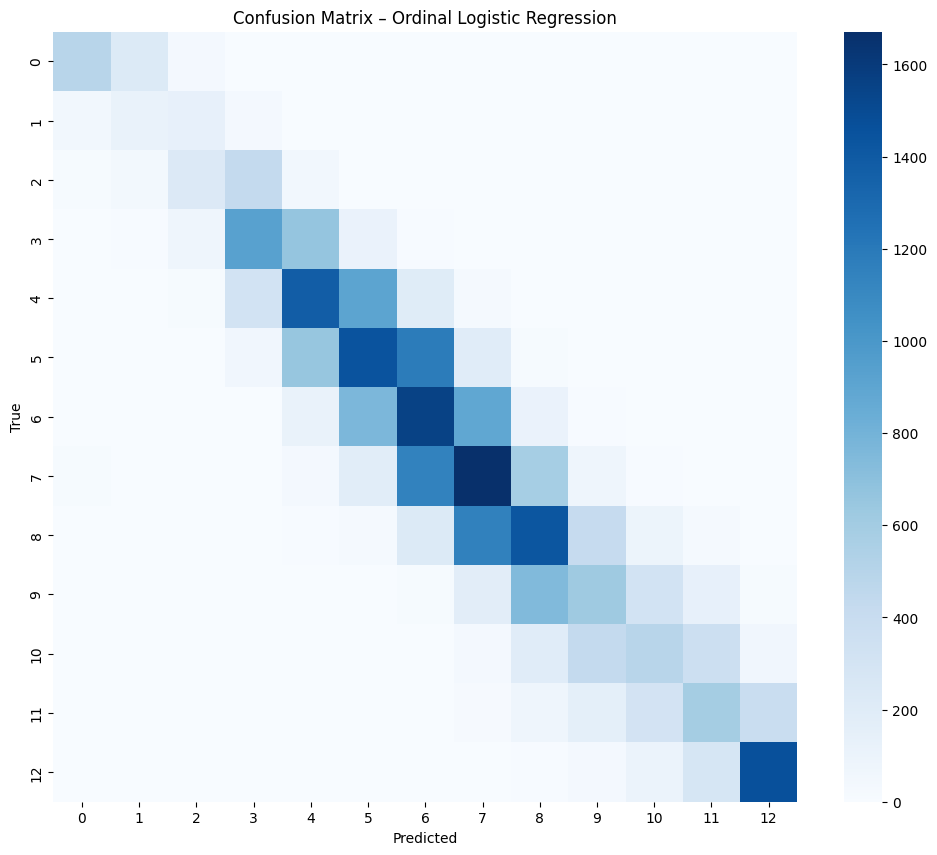

In [62]:
cm = confusion_matrix(y_logreg_test, y_pred_ordlog)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix – Ordinal Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Mulitnomial logistic regression (non-ordinal baseline)

In [63]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression model
model_multinom = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1
)

# Train the model
model_multinom.fit(X_logreg_train_scaled, y_logreg_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1)

In [64]:
#predictions
y_pred_multinom = model_multinom.predict(X_logreg_test_scaled)


In [65]:
kappa = cohen_kappa_score(y_logreg_test, y_pred_multinom, weights='quadratic')
print("Quadratic Weighted Kappa:", round(kappa, 4))

accuracy = accuracy_score(y_logreg_test, y_pred_multinom)
print("Accuracy:", round(accuracy, 4))

Quadratic Weighted Kappa: 0.9485
Accuracy: 0.4861


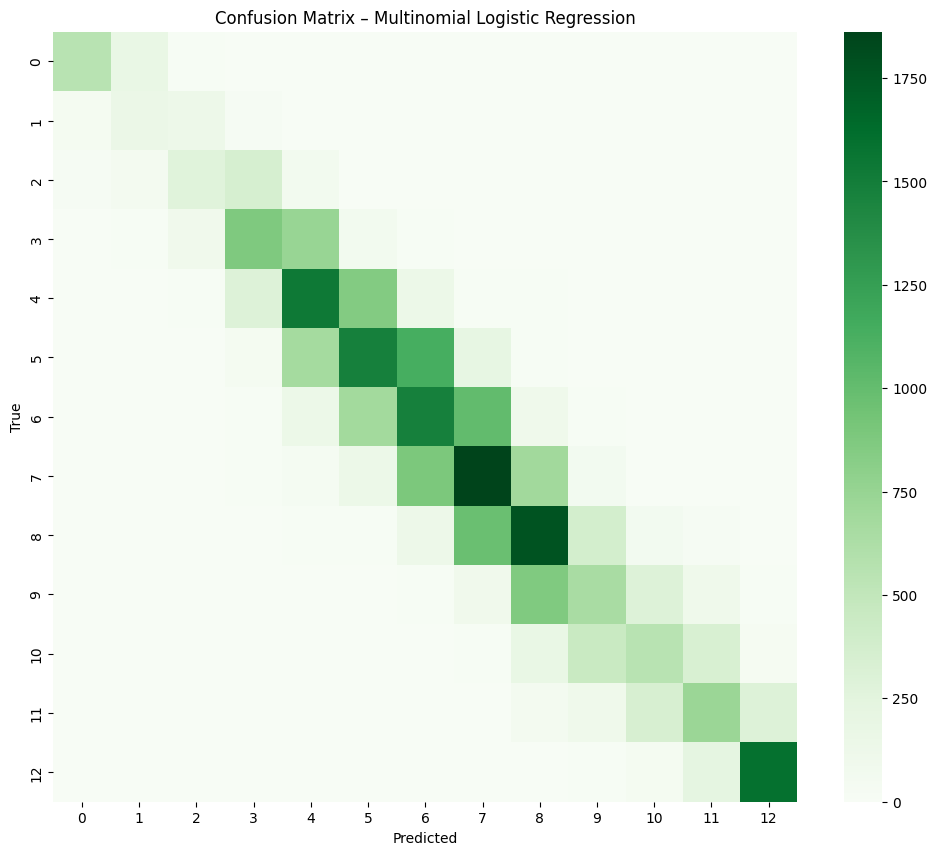

In [66]:
cm_multi = confusion_matrix(y_logreg_test, y_pred_multinom)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_multi, annot=False, cmap="Greens")
plt.title("Confusion Matrix – Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# CatBoost

tune both ordinal and multiclass of each model

In [67]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 13.9 MB/s eta 0:00:00


In [68]:
from catboost import CatBoostClassifier

model_cat_class = CatBoostClassifier(
    loss_function="MultiClass",
    eval_metric="MultiClass",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    random_seed=42,
    task_type="GPU",
    verbose=200,
    early_stopping_rounds=100
)

model_cat_class.fit(
    X_tree_train,
    y_tree_train,
    cat_features=cat_features,
    eval_set=(X_tree_test, y_tree_test),
    use_best_model=True
)

0:	learn: 2.4996363	test: 2.5129114	best: 2.5129114 (0)	total: 33.9ms	remaining: 1m 7s
200:	learn: 1.1783182	test: 1.4113130	best: 1.4113130 (200)	total: 5.43s	remaining: 48.6s
400:	learn: 1.0302160	test: 1.3090676	best: 1.3090676 (400)	total: 10.9s	remaining: 43.7s
600:	learn: 0.9532593	test: 1.2625971	best: 1.2625971 (600)	total: 16.1s	remaining: 37.6s
800:	learn: 0.9005574	test: 1.2333540	best: 1.2333540 (800)	total: 21.2s	remaining: 31.7s
1000:	learn: 0.8615211	test: 1.2135217	best: 1.2134781 (999)	total: 26.1s	remaining: 26s
1200:	learn: 0.8284760	test: 1.1982413	best: 1.1982413 (1200)	total: 30.9s	remaining: 20.6s
1400:	learn: 0.8010547	test: 1.1857070	best: 1.1857070 (1400)	total: 35.8s	remaining: 15.3s
1600:	learn: 0.7743223	test: 1.1756089	best: 1.1755881 (1599)	total: 40.7s	remaining: 10.1s
1800:	learn: 0.7488998	test: 1.1653253	best: 1.1653253 (1800)	total: 45.6s	remaining: 5.04s
1999:	learn: 0.7289888	test: 1.1579601	best: 1.1579601 (1999)	total: 50.3s	remaining: 0us
bestTe

In [69]:
# Multiclass predictions (class indices)
y_pred_cat_class = model_cat_class.predict(X_tree_test).astype(int)

In [70]:
from catboost import CatBoostRegressor

model_cat_ord = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="RMSE",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    random_seed=42,
    task_type="GPU",
    verbose=200,
    early_stopping_rounds=100
)

model_cat_ord.fit(
    X_tree_train,
    y_tree_train,
    cat_features=cat_features,
    eval_set=(X_tree_test, y_tree_test),
    use_best_model=True
)

0:	learn: 2.8036761	test: 2.8664339	best: 2.8664339 (0)	total: 37.7ms	remaining: 1m 15s
200:	learn: 0.7285613	test: 0.8930917	best: 0.8930917 (200)	total: 6.64s	remaining: 59.5s
400:	learn: 0.6340346	test: 0.7917767	best: 0.7917767 (400)	total: 13.2s	remaining: 52.5s
600:	learn: 0.5918564	test: 0.7510941	best: 0.7510941 (600)	total: 19.7s	remaining: 45.8s
800:	learn: 0.5650104	test: 0.7276952	best: 0.7276952 (800)	total: 26.1s	remaining: 39s
1000:	learn: 0.5458928	test: 0.7117512	best: 0.7117512 (1000)	total: 32.4s	remaining: 32.4s
1200:	learn: 0.5305944	test: 0.6997973	best: 0.6997883 (1198)	total: 38.9s	remaining: 25.9s
1400:	learn: 0.5181752	test: 0.6905476	best: 0.6905476 (1400)	total: 45.6s	remaining: 19.5s
1600:	learn: 0.5075518	test: 0.6839242	best: 0.6839242 (1600)	total: 52.5s	remaining: 13.1s
1800:	learn: 0.4986336	test: 0.6781385	best: 0.6781385 (1800)	total: 59.2s	remaining: 6.54s
1999:	learn: 0.4903196	test: 0.6731960	best: 0.6731960 (1999)	total: 1m 5s	remaining: 0us
best

In [71]:
# Ordinal predictions
y_pred_cat_ord = model_cat_ord.predict(X_tree_test).astype(int)

# LightGBM

In [72]:
!pip install lightgbm

In [73]:
import lightgbm as lgb

# ---- LightGBM model ----
model_lgb_ord = lgb.LGBMRegressor(
    objective="regression",
    metric="rmse",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    random_state=42
)

# Fit using sklearn API
model_lgb_ord.fit(
    X_tree_train,
    y_tree_train,
    eval_set=[(X_tree_test, y_tree_test)],
    eval_metric="rmse",
    categorical_feature=cat_features,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100, verbose=True)
    ]
)


# Predict continuous output
y_pred_cont_lgb_ord = model_lgb_ord.predict(X_tree_test)

# Round to ordinal class index
y_pred_lgb_ord = (
    np.round(y_pred_cont_lgb_ord)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5195
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 67
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.891661
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [74]:
import lightgbm as lgb

num_classes = len(rating_order)

model_lgb_class = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=num_classes,
    metric="multi_logloss",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    random_state=42
)

model_lgb_class.fit(
    X_tree_train,
    y_tree_train,
    eval_set=[(X_tree_test, y_tree_test)],
    categorical_feature=cat_features,
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5195
[LightGBM] [Info] Number of data points in the train set: 69633, number of used features: 67
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -4.338649
[LightGBM] [Info] Start training from score -4.453960
[LightGBM] [Info] Start training from score -3.962581
[LightGBM] [Info] Start training from score -2.802930
[LightGBM] [Info] Start training from score -2.227403
[LightGBM] [Info] Start training from score -2.034964
[LightGBM] [Info] Start training from score -2.012579
[LightGBM] [Info] Start training from score -2.013117
[LightGBM] [Info] Start training from score -2.138495
[

LGBMClassifier(learning_rate=0.03, max_depth=8, metric='multi_logloss',
               n_estimators=2000, num_class=13, objective='multiclass',
               random_state=42, reg_lambda=5)

In [75]:
y_pred_lgb_class = model_lgb_class.predict(X_tree_test)

# XGBoost

In [76]:
from sklearn.preprocessing import LabelEncoder

tree_df_encoded = tree_df.copy()

cat_cols = tree_df_encoded.select_dtypes(include=["object", "category"]).columns

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    tree_df_encoded[col] = le.fit_transform(tree_df_encoded[col].astype(str))
    label_encoders[col] = le

# Recreate splits
X_tree_train_enc = tree_df_encoded.loc[tree_train_idx].drop(columns=["EnergyRating"])
X_tree_test_enc  = tree_df_encoded.loc[tree_test_idx].drop(columns=["EnergyRating"])
y_tree_train_enc = y_tree_train
y_tree_test_enc  = y_tree_test


In [77]:
import xgboost as xgb

model_xgb_ord = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="hist",  # CPU-compatible fast histogram algorithm
    random_state=42
)

model_xgb_ord.fit(
    X_tree_train_enc,
    y_tree_train_enc,
    eval_set=[(X_tree_test_enc, y_tree_test_enc)],
    verbose=200
)

# ---- Predictions ----
y_pred_cont_xgb_ord = model_xgb_ord.predict(X_tree_test_enc)

# Convert continuous → ordinal class
y_pred_xgb_ord = (
    np.round(y_pred_cont_xgb_ord)
    .clip(0, max(rating_to_num.values()))
    .astype(int)
)


[0]	validation_0-rmse:2.85872
[200]	validation_0-rmse:0.82897
[400]	validation_0-rmse:0.76585
[600]	validation_0-rmse:0.74539
[800]	validation_0-rmse:0.73324
[1000]	validation_0-rmse:0.72520
[1200]	validation_0-rmse:0.72079
[1400]	validation_0-rmse:0.71715
[1600]	validation_0-rmse:0.71510
[1800]	validation_0-rmse:0.71384
[1999]	validation_0-rmse:0.71350


In [78]:
num_classes = len(rating_order)

model_xgb_class = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    reg_lambda=5,
    subsample=0.9,
    colsample_bytree=0.9,
    tree_method="hist",
    random_state=42,
    eval_metric="mlogloss"
)

model_xgb_class.fit(
    X_tree_train_enc,
    y_tree_train_enc,
    eval_set=[(X_tree_test_enc, y_tree_test_enc)],
    verbose=200
)



[0]	validation_0-mlogloss:2.50817
[200]	validation_0-mlogloss:1.41208
[400]	validation_0-mlogloss:1.31311
[600]	validation_0-mlogloss:1.27617
[800]	validation_0-mlogloss:1.25737
[1000]	validation_0-mlogloss:1.24814
[1200]	validation_0-mlogloss:1.24559
[1400]	validation_0-mlogloss:1.24572
[1600]	validation_0-mlogloss:1.24835
[1800]	validation_0-mlogloss:1.25213
[1999]	validation_0-mlogloss:1.25704


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None, num_class=13, ...)

In [79]:
y_pred_xgb_class = model_xgb_class.predict(X_tree_test_enc)

# EVALUATION


================= MODEL PERFORMANCE =================

XGBoost – Multiclass:
  QWK:       0.9414
  Accuracy:  0.4750

XGBoost – Ordinal:
  QWK:       0.9644
  Accuracy:  0.5618

LightGBM – Multiclass:
  QWK:       0.9414
  Accuracy:  0.4716

LightGBM – Ordinal:
  QWK:       0.9679
  Accuracy:  0.5781

CatBoost – Multiclass:
  QWK:       0.9484
  Accuracy:  0.5000

CatBoost – Ordinal:
  QWK:       0.9546
  Accuracy:  0.4562


================= RANKING BY QWK (BEST → WORST) =================

1. LightGBM – Ordinal         QWK = 0.9679
2. XGBoost – Ordinal          QWK = 0.9644
3. CatBoost – Ordinal         QWK = 0.9546
4. CatBoost – Multiclass      QWK = 0.9484
5. XGBoost – Multiclass       QWK = 0.9414
6. LightGBM – Multiclass      QWK = 0.9414


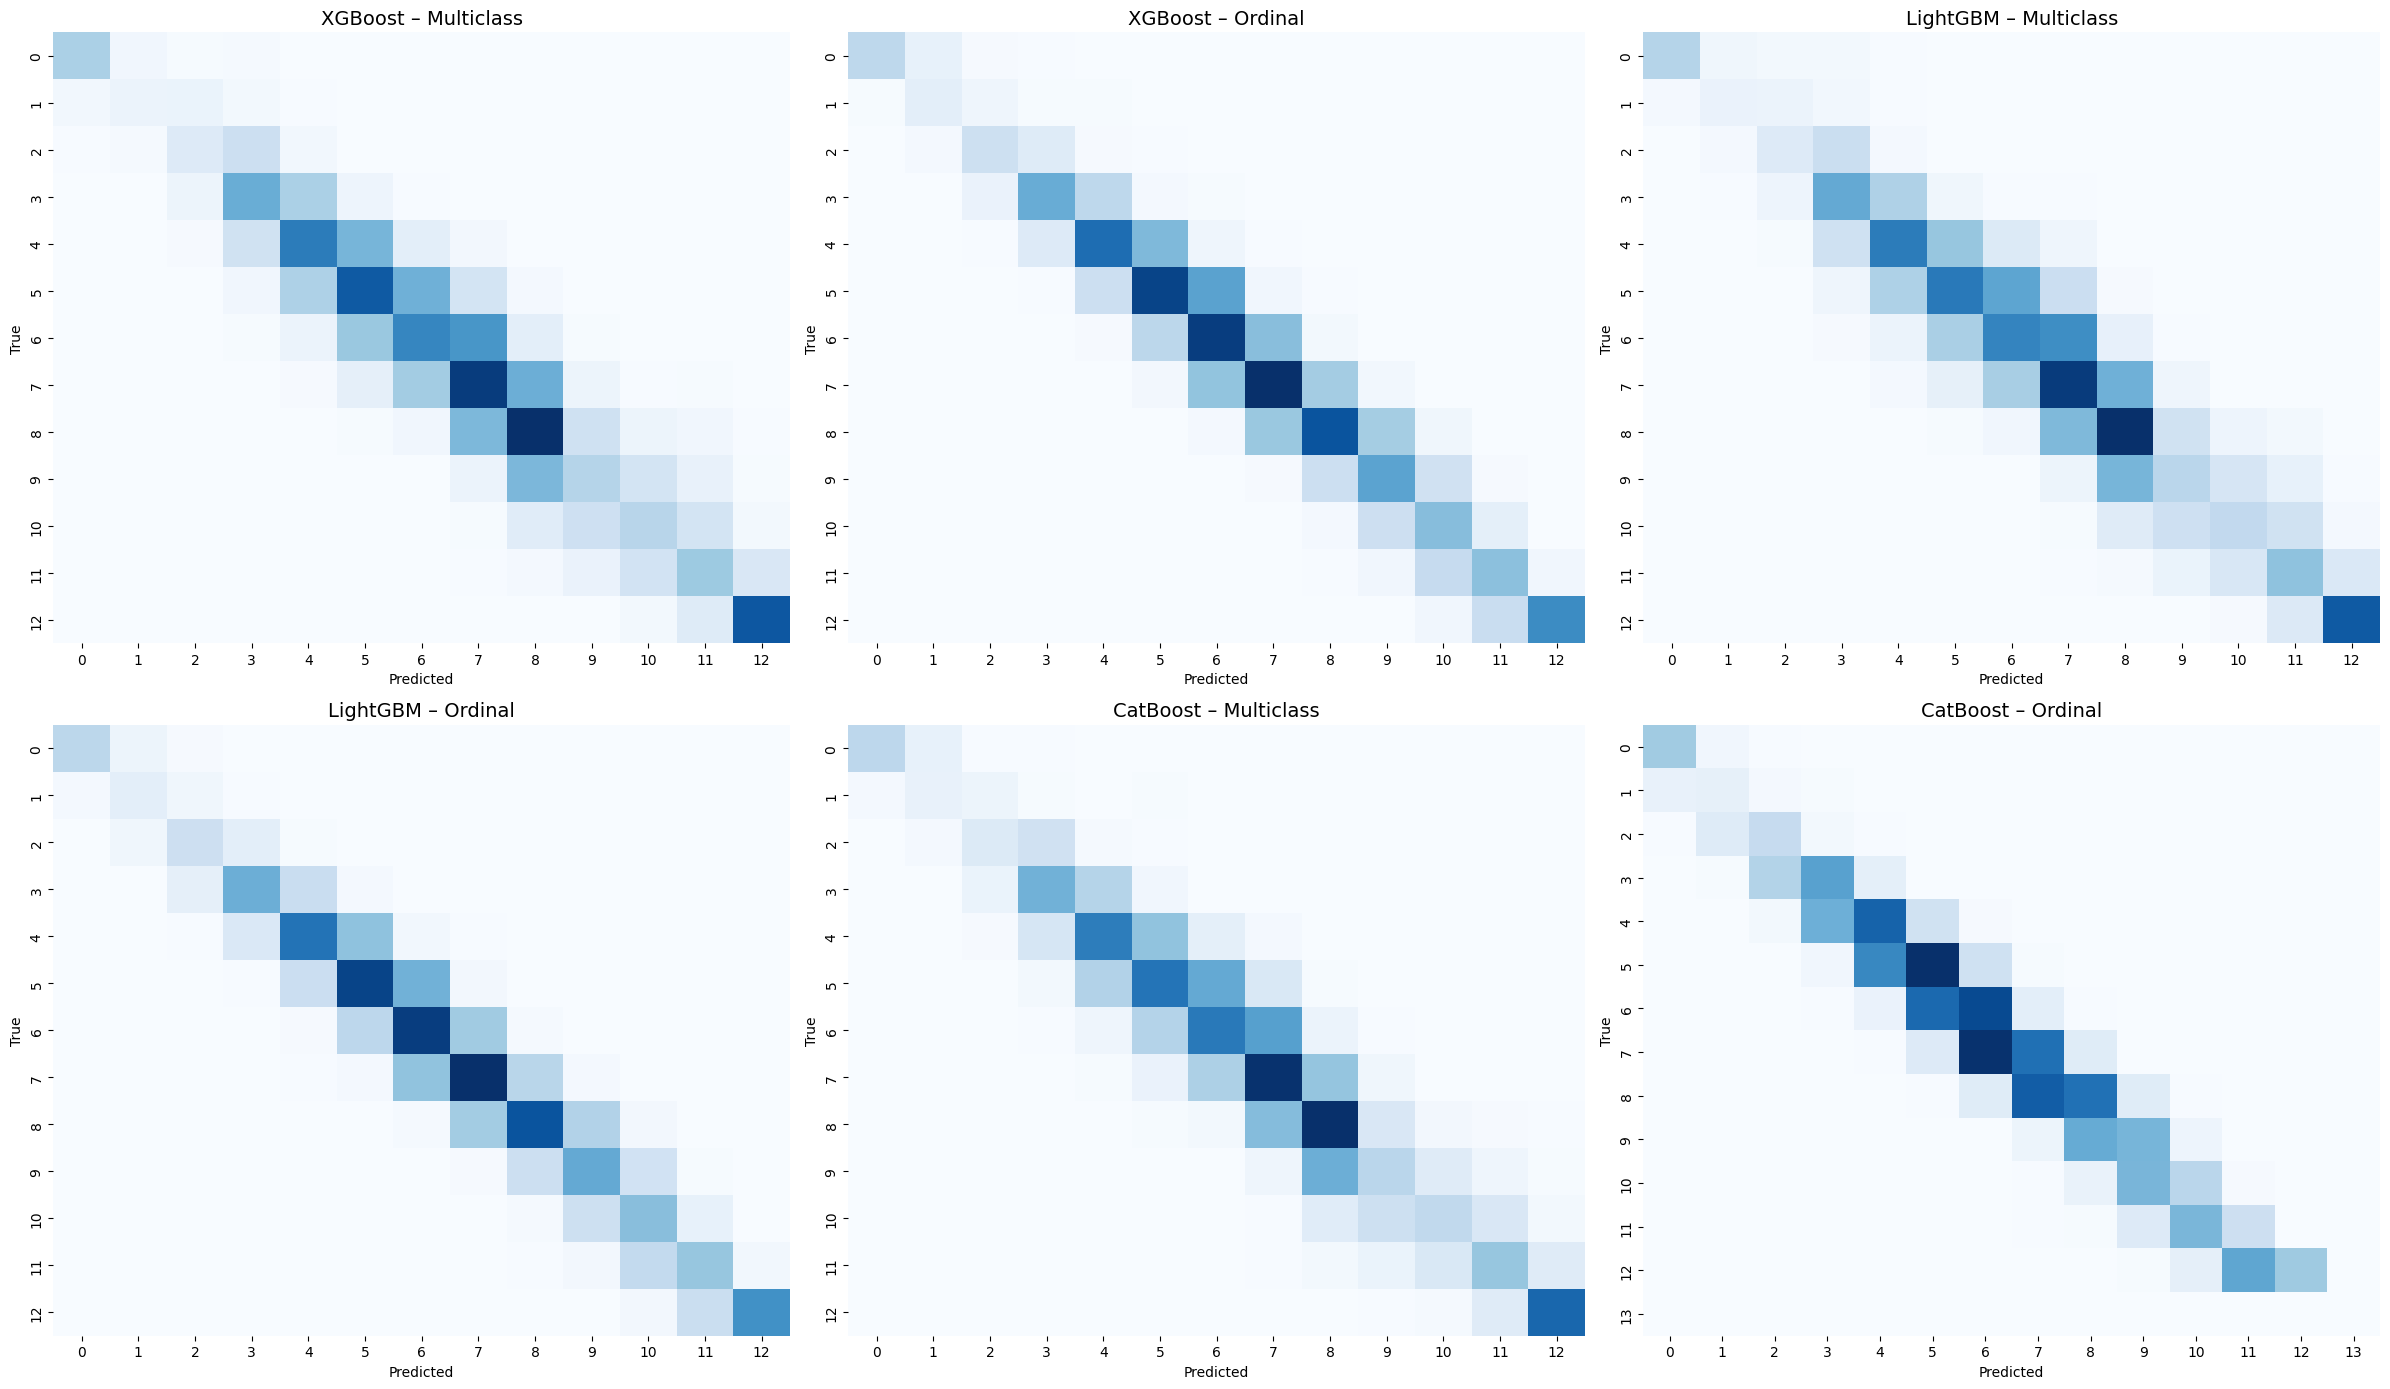

In [80]:

# STORE ALL MODEL PREDICTIONS
models = {
    "XGBoost – Multiclass": y_pred_xgb_class,
    "XGBoost – Ordinal":    y_pred_xgb_ord,
    "LightGBM – Multiclass": y_pred_lgb_class,
    "LightGBM – Ordinal":    y_pred_lgb_ord,
    "CatBoost – Multiclass": y_pred_cat_class,
    "CatBoost – Ordinal":    y_pred_cat_ord
}


# PRINT QWK + ACCURACY FOR EACH MODEL
results = {}

print("\n================= MODEL PERFORMANCE =================\n")
for name, pred in models.items():
    qwk = cohen_kappa_score(y_tree_test, pred, weights='quadratic')
    acc = accuracy_score(y_tree_test, pred)

    results[name] = {"QWK": qwk, "Accuracy": acc}

    print(f"{name}:")
    print(f"  QWK:       {qwk:.4f}")
    print(f"  Accuracy:  {acc:.4f}\n")


# RANK MODELS BY QWK
ranked = sorted(results.items(), key=lambda x: x[1]["QWK"], reverse=True)

print("\n================= RANKING BY QWK (BEST → WORST) =================\n")
for i, (model_name, metrics) in enumerate(ranked, start=1):
    print(f"{i}. {model_name:25s}  QWK = {metrics['QWK']:.4f}")


# CONFUSION MATRICES (2x3 GRID)
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
axes = axes.flatten()

for ax, (name, pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_tree_test, pred)
    sns.heatmap(cm, cmap="Blues", ax=ax, cbar=False)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


# Feature block selection

In [98]:
feature_blocks = {
    "metadata": [
        "CountyName", "DwellingTypeDescr", "Year_of_Construction",
        "TypeofRating", "NoStoreys", "StructureType", "HESSchemeUpgrade", "MultiDwellingMPRN"
    ],
    "geometry": [
        "GroundFloorArea(sq m)", "WallArea", "RoofArea", "FloorArea",
        "WindowArea", "DoorArea", "GroundFloorArea", "GroundFloorHeight",
        "FirstFloorArea", "FirstFloorHeight", "PredominantRoofTypeArea", "SuspendedWoodenFloor"
    ],
    "fabric": [
        "UValueWall", "UValueRoof", "UValueFloor", "UValueWindow",
        "UvalueDoor", "ThermalBridgingFactor", "ThermalMassCategory",
        "PredominantRoofType"
    ],
    "ventilation": [
        "VentilationMethod", "DraftLobby", "NoOfFansAndVents",
        "NoOfChimneys", "NoOfOpenFlues", "NoOfSidesSheltered",
        "PermeabilityTest", "PercentageDraughtStripped"
    ],
    "heating_type": [
      "MainSpaceHeatingFuel",
      "MainWaterHeatingFuel",
      "SupplSHFuel",
      "SupplWHFuel",
      "UndergroundHeating"
    ],
    "heating_control": [
        "NoCentralHeatingPumps", "CHBoilerThermostatControlled",
        "NoOilBoilerHeatingPumps", "OBBoilerThermostatControlled",
        "OBPumpInsideDwelling", "NoGasBoilerHeatingPumps",
        "WarmAirHeatingSystem", "CombiBoiler", "KeepHotFacility",
        "CylinderStat", "CombinedCylinder"
    ],
    "hot_water": [
        "SolarHotWaterHeating", "ElecImmersionInSummer",
        "WaterStorageVolume", "InsulationType", "InsulationThickness"
    ],
    "renewables": [
      "SHRenewableResources", "WHRenewableResources", "SWHPumpSolarPowered"
    ],
    "efficiency_losses": [
        "HSMainSystemEfficiency", "TGDLEdition", "HSEffAdjFactor",
        "HSSupplHeatFraction", "DistributionLosses", "StorageLosses",
        "ManuLossFactorAvail"
    ]
}


In [103]:
#baseline metrics

baseline_qwk = cohen_kappa_score(y_tree_test, y_pred_lgb_ord, weights="quadratic")
baseline_acc = accuracy_score(y_tree_test, y_pred_lgb_ord)

results = [{
    "Feature Configuration": "All Features",
    "QWK": baseline_qwk,
    "Accuracy": baseline_acc,
    "Δ QWK vs All": 0.0,
    "Δ Accuracy": 0.0
}]


In [104]:

#  train LightGBM ordinal + return QWK & Accuracy

def run_lgb_ordinal(X_train, X_valid, y_train, y_valid, cat_cols, random_state=42):
    model = lgb.LGBMRegressor(
        objective="regression",
        metric="rmse",
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=8,
        reg_lambda=5,
        random_state=random_state
    )

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="rmse",
        categorical_feature=cat_cols,
        callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
    )

    # Continuous → ordinal class
    y_pred_cont = model.predict(X_valid)
    max_class = int(max(y_train.max(), y_valid.max()))
    y_pred = (
        np.round(y_pred_cont)
        .clip(0, max_class)
        .astype(int)
    )

    qwk = cohen_kappa_score(y_valid, y_pred, weights="quadratic")
    acc = accuracy_score(y_valid, y_pred)
    return qwk, acc



In [105]:

# Remove-One-Block
all_features = X_tree_train.columns.tolist()
cat_all = [c for c in cat_features if c in all_features]

for block_name, cols in feature_blocks.items():
    # Make sure we only drop columns that actually exist
    cols_to_remove = [c for c in cols if c in all_features]
    remaining_features = [c for c in all_features if c not in cols_to_remove]
    cat_remaining = [c for c in cat_features if c in remaining_features]

    qwk, acc = run_lgb_ordinal(
        X_tree_train[remaining_features],
        X_tree_test[remaining_features],
        y_tree_train,
        y_tree_test,
        cat_remaining
    )

    results.append({
        "Feature Configuration": f"All minus {block_name}",
        "QWK": qwk,
        "Accuracy": acc,
        "Δ QWK vs All": qwk - baseline_qwk,
        "Δ Accuracy": acc - baseline_acc
    })


In [106]:
results_df = pd.DataFrame(results)
results_df

,Feature Configuration,QWK,Accuracy,Δ QWK vs All,Δ Accuracy
0,All Features,0.967920,0.578091,0.000000,0.000000
1,All minus metadata,0.967771,0.579747,-0.000149,0.001655
2,All minus geometry,0.954063,0.511876,-0.013857,-0.066216
3,All minus fabric,0.900117,0.374046,-0.067803,-0.204045
4,All minus ventilation,0.964699,0.548942,-0.003222,-0.029149
5,All minus heating_type,0.966701,0.567187,-0.001219,-0.010904
6,All minus heating_control,0.967178,0.577947,-0.000743,-0.000144
7,All minus hot_water,0.962127,0.543616,-0.005793,-0.034475
8,All minus renewables,0.967606,0.576868,-0.000314,-0.001224
9,All minus efficiency_losses,0.951676,0.480855,-0.016245,-0.097236


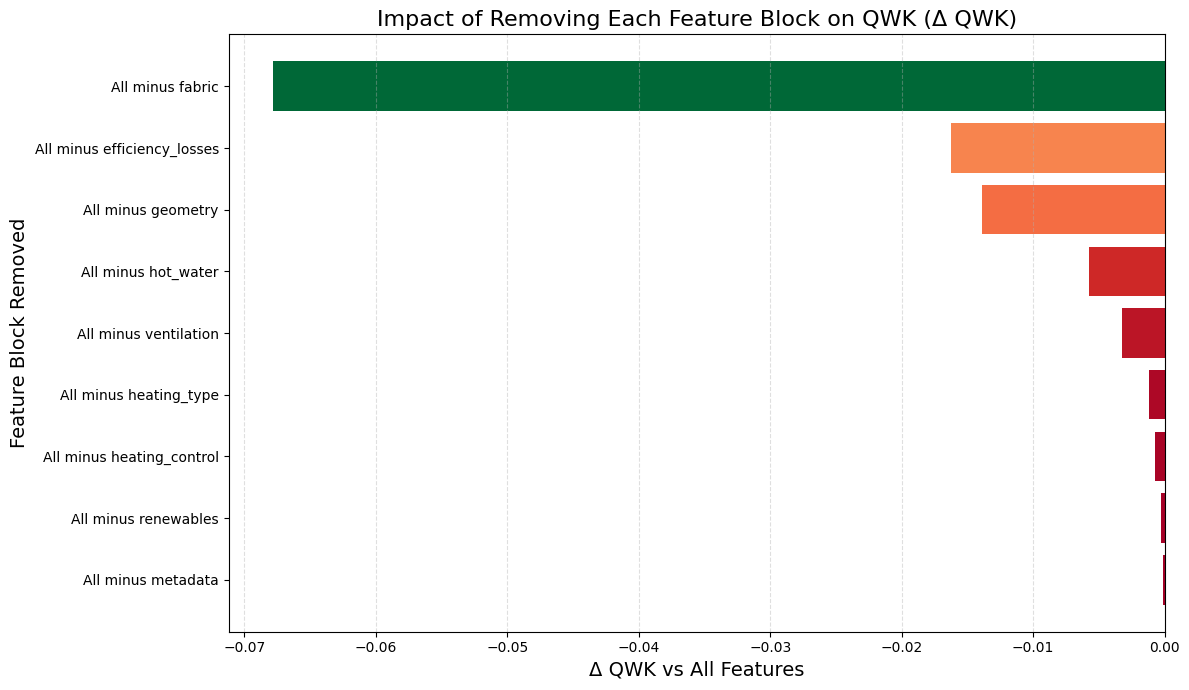

In [115]:
# Sort blocks from most to least important (largest negative Δ QWK)
plot_df = results_df.copy()
plot_df = plot_df[plot_df["Feature Configuration"] != "All Features"]
plot_df = plot_df.sort_values("Δ QWK vs All", ascending=False)

# Normalise Δ QWK for colour mapping
vals = plot_df["Δ QWK vs All"].values
norm = (vals - vals.min()) / (vals.max() - vals.min())

# Correct BER-style colormap (green → red)
colors = plt.cm.RdYlGn_r(norm)

# Plot
plt.figure(figsize=(12, 7))
bars = plt.barh(plot_df["Feature Configuration"], plot_df["Δ QWK vs All"], color=colors)

plt.title("Impact of Removing Each Feature Block on QWK (Δ QWK)", fontsize=16)
plt.xlabel("Δ QWK vs All Features", fontsize=14)
plt.ylabel("Feature Block Removed", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [117]:
best_blocks = (
    feature_blocks["fabric"]
    + feature_blocks["efficiency_losses"]
    + feature_blocks["geometry"]
    + feature_blocks["hot_water"]
    + feature_blocks["ventilation"]
)

X_train_red = X_tree_train[best_blocks]
X_test_red  = X_tree_test[best_blocks]

# hyper-parameter tuning

In [118]:
# Remove categorical features that don't exist in the reduced set
cat_features_red = [c for c in cat_features if c in best_blocks]

#for xgboost
X_train_red_enc = X_tree_train_enc[best_blocks]
X_test_red_enc  = X_tree_test_enc[best_blocks]


In [119]:
!pip install optuna
import optuna

CatBoost Tuned

In [120]:
def objective_catboost(trial):

    params = {
        "loss_function": "RMSE",
        "eval_metric": "RMSE",
        "iterations": trial.suggest_int("iterations", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 20),
        "random_seed": 42,
        "task_type": "GPU",
        "verbose": False
    }

    model = CatBoostRegressor(**params)

    model.fit(
        X_train_red,
        y_tree_train,
        cat_features=cat_features_red,
        eval_set=(X_test_red, y_tree_test),
        verbose=False,
    )

    # Predict → round → ordinal
    y_cont = model.predict(X_test_red)
    y_pred = (
        np.round(y_cont)
        .clip(0, max(y_tree_test.max(), y_tree_train.max()))
        .astype(int)
    )

    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")


In [121]:
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_catboost, n_trials=40)

best_cat_params = study_cat.best_params
best_cat_params


[I 2025-11-29 21:58:34,645] A new study created in memory with name: no-name-f2b2fdb7-02f9-4611-9e51-0de8398640bb
[I 2025-11-29 21:58:52,062] Trial 0 finished with value: 0.9662698260781513 and parameters: {'iterations': 1390, 'learning_rate': 0.08060999640815114, 'depth': 5, 'l2_leaf_reg': 10.85138785272184}. Best is trial 0 with value: 0.9662698260781513.
[I 2025-11-29 21:59:14,076] Trial 1 finished with value: 0.9628730957935114 and parameters: {'iterations': 1442, 'learning_rate': 0.027464728674985714, 'depth': 6, 'l2_leaf_reg': 6.8411794492918485}. Best is trial 0 with value: 0.9662698260781513.
[I 2025-11-29 21:59:24,526] Trial 2 finished with value: 0.9640370103335879 and parameters: {'iterations': 821, 'learning_rate': 0.08439396211959, 'depth': 5, 'l2_leaf_reg': 19.1200910737697}. Best is trial 0 with value: 0.9662698260781513.
[I 2025-11-29 21:59:58,717] Trial 3 finished with value: 0.9634266653665581 and parameters: {'iterations': 1580, 'learning_rate': 0.0230743316100986, '

{'iterations': 2437,
 'learning_rate': 0.06480792178452903,
 'depth': 7,
 'l2_leaf_reg': 7.488674855765236}

LGBM Tuned

In [127]:
def objective_lgbm(trial):

    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": trial.suggest_int("n_estimators", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 20),
        "random_state": 42
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train_red,
        y_tree_train,
        eval_set=[(X_test_red, y_tree_test)],
        categorical_feature=cat_features_red,
        callbacks=[
            lgb.early_stopping(stopping_rounds=100, verbose=True)
        ]
    )

    y_cont = model.predict(X_test_red)
    y_pred = (
        np.round(y_cont)
        .clip(0, max(y_tree_test.max(), y_tree_train.max()))
        .astype(int)
    )

    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")


In [128]:
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=40)

best_lgbm_params = study_lgbm.best_params
best_lgbm_params


[I 2025-11-29 22:33:30,436] A new study created in memory with name: no-name-5e192476-88a1-4051-8fb8-aceadc54b471


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1006]	valid_0's rmse: 0.731655


[I 2025-11-29 22:33:41,848] Trial 0 finished with value: 0.9622888418852908 and parameters: {'n_estimators': 2100, 'learning_rate': 0.07891513502734701, 'max_depth': 10, 'num_leaves': 219, 'reg_lambda': 18.607602757188975}. Best is trial 0 with value: 0.9622888418852908.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2116]	valid_0's rmse: 0.703075


[I 2025-11-29 22:33:50,655] Trial 1 finished with value: 0.9657201157592454 and parameters: {'n_estimators': 2131, 'learning_rate': 0.058812082229110364, 'max_depth': 5, 'num_leaves': 168, 'reg_lambda': 11.183122047005682}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2170]	valid_0's rmse: 0.704815


[I 2025-11-29 22:33:57,614] Trial 2 finished with value: 0.9656172080153654 and parameters: {'n_estimators': 2170, 'learning_rate': 0.0515841173207656, 'max_depth': 5, 'num_leaves': 143, 'reg_lambda': 14.647391992408142}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1488]	valid_0's rmse: 0.708532


[I 2025-11-29 22:34:05,513] Trial 3 finished with value: 0.9652884090317984 and parameters: {'n_estimators': 1575, 'learning_rate': 0.07349301508329338, 'max_depth': 8, 'num_leaves': 61, 'reg_lambda': 6.829649217911882}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[715]	valid_0's rmse: 0.733832


[I 2025-11-29 22:34:11,080] Trial 4 finished with value: 0.9625400619885556 and parameters: {'n_estimators': 801, 'learning_rate': 0.08671028741848426, 'max_depth': 8, 'num_leaves': 199, 'reg_lambda': 10.232001939067292}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1619]	valid_0's rmse: 0.700938


[I 2025-11-29 22:34:16,053] Trial 5 finished with value: 0.9656320531184878 and parameters: {'n_estimators': 1660, 'learning_rate': 0.09956942130748007, 'max_depth': 4, 'num_leaves': 161, 'reg_lambda': 3.899414939030683}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2296]	valid_0's rmse: 0.711862


[I 2025-11-29 22:34:21,997] Trial 6 finished with value: 0.964823187820205 and parameters: {'n_estimators': 2296, 'learning_rate': 0.038072922080668536, 'max_depth': 4, 'num_leaves': 119, 'reg_lambda': 1.3722742502545893}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2236]	valid_0's rmse: 0.703227


[I 2025-11-29 22:34:31,005] Trial 7 finished with value: 0.9655833718290447 and parameters: {'n_estimators': 2403, 'learning_rate': 0.05525962363570895, 'max_depth': 8, 'num_leaves': 38, 'reg_lambda': 6.920136852568785}. Best is trial 1 with value: 0.9657201157592454.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1726]	valid_0's rmse: 0.699252


[I 2025-11-29 22:34:36,664] Trial 8 finished with value: 0.9658518771462246 and parameters: {'n_estimators': 1772, 'learning_rate': 0.07453776239138413, 'max_depth': 5, 'num_leaves': 102, 'reg_lambda': 8.006843582269607}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1680]	valid_0's rmse: 0.719836


[I 2025-11-29 22:34:50,166] Trial 9 finished with value: 0.9636667529248355 and parameters: {'n_estimators': 1688, 'learning_rate': 0.051567044152012645, 'max_depth': 10, 'num_leaves': 144, 'reg_lambda': 12.273544777581236}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1155]	valid_0's rmse: 0.783973


[I 2025-11-29 22:34:56,431] Trial 10 finished with value: 0.9571737402134537 and parameters: {'n_estimators': 1155, 'learning_rate': 0.012257839974705254, 'max_depth': 6, 'num_leaves': 90, 'reg_lambda': 18.334165321811547}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1888]	valid_0's rmse: 0.708617


[I 2025-11-29 22:35:04,091] Trial 11 finished with value: 0.9648632313685854 and parameters: {'n_estimators': 1906, 'learning_rate': 0.0663356245527502, 'max_depth': 6, 'num_leaves': 184, 'reg_lambda': 10.060381350873978}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1890]	valid_0's rmse: 0.710558


[I 2025-11-29 22:35:12,630] Trial 12 finished with value: 0.9649760881097903 and parameters: {'n_estimators': 1897, 'learning_rate': 0.03600404150195334, 'max_depth': 6, 'num_leaves': 242, 'reg_lambda': 14.052198765440895}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1348]	valid_0's rmse: 0.708711


[I 2025-11-29 22:35:17,071] Trial 13 finished with value: 0.9653831093942298 and parameters: {'n_estimators': 1348, 'learning_rate': 0.06527708919336134, 'max_depth': 5, 'num_leaves': 101, 'reg_lambda': 7.66920292514345}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1657]	valid_0's rmse: 0.703967


[I 2025-11-29 22:35:23,485] Trial 14 finished with value: 0.9654753419213246 and parameters: {'n_estimators': 2495, 'learning_rate': 0.09607647483983085, 'max_depth': 5, 'num_leaves': 76, 'reg_lambda': 4.51069772090472}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1929]	valid_0's rmse: 0.706829


[I 2025-11-29 22:35:29,148] Trial 15 finished with value: 0.9654482487508788 and parameters: {'n_estimators': 1929, 'learning_rate': 0.04068115747690783, 'max_depth': 7, 'num_leaves': 17, 'reg_lambda': 14.934442588625778}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2082]	valid_0's rmse: 0.701885


[I 2025-11-29 22:35:35,083] Trial 16 finished with value: 0.9656419190997838 and parameters: {'n_estimators': 2090, 'learning_rate': 0.08428000645797616, 'max_depth': 4, 'num_leaves': 172, 'reg_lambda': 11.78181581677412}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1246]	valid_0's rmse: 0.717096


[I 2025-11-29 22:35:42,142] Trial 17 finished with value: 0.9640813939011901 and parameters: {'n_estimators': 1493, 'learning_rate': 0.06485091878234689, 'max_depth': 7, 'num_leaves': 118, 'reg_lambda': 8.712414004263325}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1817]	valid_0's rmse: 0.721768


[I 2025-11-29 22:35:48,880] Trial 18 finished with value: 0.9637443224869193 and parameters: {'n_estimators': 1817, 'learning_rate': 0.02907298107060718, 'max_depth': 5, 'num_leaves': 213, 'reg_lambda': 4.467322215769643}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1181]	valid_0's rmse: 0.711242


[I 2025-11-29 22:35:53,853] Trial 19 finished with value: 0.9648209437816918 and parameters: {'n_estimators': 1181, 'learning_rate': 0.05847222801489973, 'max_depth': 6, 'num_leaves': 63, 'reg_lambda': 12.313288827031888}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[948]	valid_0's rmse: 0.723361


[I 2025-11-29 22:36:01,324] Trial 20 finished with value: 0.9634296915621656 and parameters: {'n_estimators': 2217, 'learning_rate': 0.07542767713652931, 'max_depth': 9, 'num_leaves': 112, 'reg_lambda': 16.871892320679788}. Best is trial 8 with value: 0.9658518771462246.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2028]	valid_0's rmse: 0.696196


[I 2025-11-29 22:36:06,408] Trial 21 finished with value: 0.9663940514092374 and parameters: {'n_estimators': 2032, 'learning_rate': 0.08915139072116195, 'max_depth': 4, 'num_leaves': 173, 'reg_lambda': 12.058581619740242}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1891]	valid_0's rmse: 0.698287


[I 2025-11-29 22:36:11,527] Trial 22 finished with value: 0.9659748061944314 and parameters: {'n_estimators': 2024, 'learning_rate': 0.09312353060658679, 'max_depth': 4, 'num_leaves': 136, 'reg_lambda': 9.453623342590479}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1743]	valid_0's rmse: 0.700875


[I 2025-11-29 22:36:16,288] Trial 23 finished with value: 0.9659193685891916 and parameters: {'n_estimators': 1751, 'learning_rate': 0.08666842608894859, 'max_depth': 4, 'num_leaves': 136, 'reg_lambda': 9.28769210500627}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2014]	valid_0's rmse: 0.695715


[I 2025-11-29 22:36:21,350] Trial 24 finished with value: 0.9661104276051615 and parameters: {'n_estimators': 2024, 'learning_rate': 0.08977204777971685, 'max_depth': 4, 'num_leaves': 137, 'reg_lambda': 9.145225014645328}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1970]	valid_0's rmse: 0.69599


[I 2025-11-29 22:36:27,014] Trial 25 finished with value: 0.9661856259960979 and parameters: {'n_estimators': 1978, 'learning_rate': 0.09124286500965514, 'max_depth': 4, 'num_leaves': 152, 'reg_lambda': 6.119034744106513}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2069]	valid_0's rmse: 0.697251


[I 2025-11-29 22:36:32,356] Trial 26 finished with value: 0.9662580405267822 and parameters: {'n_estimators': 2348, 'learning_rate': 0.09170111189938975, 'max_depth': 4, 'num_leaves': 158, 'reg_lambda': 6.288843494246593}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2310]	valid_0's rmse: 0.694889


[I 2025-11-29 22:36:38,599] Trial 27 finished with value: 0.9660007976837892 and parameters: {'n_estimators': 2320, 'learning_rate': 0.08190777339918921, 'max_depth': 4, 'num_leaves': 189, 'reg_lambda': 5.490640243478561}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[882]	valid_0's rmse: 0.728187


[I 2025-11-29 22:36:44,395] Trial 28 finished with value: 0.9629126362425332 and parameters: {'n_estimators': 2284, 'learning_rate': 0.09465418079183853, 'max_depth': 7, 'num_leaves': 155, 'reg_lambda': 2.147510125550026}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1795]	valid_0's rmse: 0.703273


[I 2025-11-29 22:36:50,433] Trial 29 finished with value: 0.9655141994772705 and parameters: {'n_estimators': 2488, 'learning_rate': 0.09961786638191464, 'max_depth': 5, 'num_leaves': 241, 'reg_lambda': 3.045870610385745}. Best is trial 21 with value: 0.9663940514092374.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1858]	valid_0's rmse: 0.69531


[I 2025-11-29 22:36:56,094] Trial 30 finished with value: 0.9663969481336869 and parameters: {'n_estimators': 2041, 'learning_rate': 0.07925532229656324, 'max_depth': 4, 'num_leaves': 197, 'reg_lambda': 5.705529332356773}. Best is trial 30 with value: 0.9663969481336869.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2026]	valid_0's rmse: 0.70255


[I 2025-11-29 22:37:01,204] Trial 31 finished with value: 0.965781261866608 and parameters: {'n_estimators': 2028, 'learning_rate': 0.08044188777151562, 'max_depth': 4, 'num_leaves': 204, 'reg_lambda': 6.105079583375147}. Best is trial 30 with value: 0.9663969481336869.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2183]	valid_0's rmse: 0.690838


[I 2025-11-29 22:37:07,384] Trial 32 finished with value: 0.9665179535615626 and parameters: {'n_estimators': 2185, 'learning_rate': 0.09120956016000417, 'max_depth': 4, 'num_leaves': 171, 'reg_lambda': 5.782830685855201}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2063]	valid_0's rmse: 0.701159


[I 2025-11-29 22:37:14,072] Trial 33 finished with value: 0.9658711629157649 and parameters: {'n_estimators': 2193, 'learning_rate': 0.07915626523529928, 'max_depth': 5, 'num_leaves': 177, 'reg_lambda': 5.324072802663978}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2354]	valid_0's rmse: 0.698719


[I 2025-11-29 22:37:22,045] Trial 34 finished with value: 0.9659079506277138 and parameters: {'n_estimators': 2358, 'learning_rate': 0.07045521095836342, 'max_depth': 5, 'num_leaves': 193, 'reg_lambda': 13.110564223946}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2148]	valid_0's rmse: 0.702021


[I 2025-11-29 22:37:27,457] Trial 35 finished with value: 0.9659338819675815 and parameters: {'n_estimators': 2148, 'learning_rate': 0.08791702169990062, 'max_depth': 4, 'num_leaves': 220, 'reg_lambda': 10.886797927869457}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1457]	valid_0's rmse: 0.708198


[I 2025-11-29 22:37:34,343] Trial 36 finished with value: 0.965321049834072 and parameters: {'n_estimators': 2225, 'learning_rate': 0.08257328540847349, 'max_depth': 6, 'num_leaves': 220, 'reg_lambda': 3.091855034195273}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1997]	valid_0's rmse: 0.700276


[I 2025-11-29 22:37:40,100] Trial 37 finished with value: 0.9659868584594978 and parameters: {'n_estimators': 2086, 'learning_rate': 0.09624737558589007, 'max_depth': 4, 'num_leaves': 167, 'reg_lambda': 7.593337638514818}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1976]	valid_0's rmse: 0.697949


[I 2025-11-29 22:37:47,233] Trial 38 finished with value: 0.9661436493783868 and parameters: {'n_estimators': 2406, 'learning_rate': 0.07203308193989819, 'max_depth': 5, 'num_leaves': 204, 'reg_lambda': 1.0609363099023597}. Best is trial 32 with value: 0.9665179535615626.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[791]	valid_0's rmse: 0.731349


[I 2025-11-29 22:37:54,336] Trial 39 finished with value: 0.9626705874472571 and parameters: {'n_estimators': 1566, 'learning_rate': 0.08886295797602975, 'max_depth': 9, 'num_leaves': 177, 'reg_lambda': 6.57448211145942}. Best is trial 32 with value: 0.9665179535615626.


{'n_estimators': 2185,
 'learning_rate': 0.09120956016000417,
 'max_depth': 4,
 'num_leaves': 171,
 'reg_lambda': 5.782830685855201}

XGB Tuned

In [129]:
def objective_xgb(trial):

    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "tree_method": "hist",
        "random_state": 42
    }

    model = xgb.XGBRegressor(**params)

    model.fit(X_train_red_enc, y_tree_train)

    y_cont = model.predict(X_test_red_enc)
    y_pred = (
        np.round(y_cont)
        .clip(0, max(y_tree_test.max(), y_tree_train.max()))
        .astype(int)
    )

    return cohen_kappa_score(y_tree_test, y_pred, weights="quadratic")


In [130]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=40)

best_xgb_params = study_xgb.best_params
best_xgb_params


[I 2025-11-29 22:38:07,004] A new study created in memory with name: no-name-5eca5707-c643-44ab-b492-fe255f20368e
[I 2025-11-29 22:38:12,178] Trial 0 finished with value: 0.961040552940263 and parameters: {'n_estimators': 1410, 'learning_rate': 0.030220348294274113, 'max_depth': 4, 'reg_lambda': 2.4986778198831257, 'subsample': 0.6933061976704671, 'colsample_bytree': 0.7181196349084568}. Best is trial 0 with value: 0.961040552940263.
[I 2025-11-29 22:38:27,355] Trial 1 finished with value: 0.9632934927690665 and parameters: {'n_estimators': 2289, 'learning_rate': 0.08269224880873946, 'max_depth': 8, 'reg_lambda': 16.596161773046582, 'subsample': 0.7719123485770891, 'colsample_bytree': 0.6132819691166284}. Best is trial 1 with value: 0.9632934927690665.
[I 2025-11-29 22:38:37,674] Trial 2 finished with value: 0.961479625164334 and parameters: {'n_estimators': 837, 'learning_rate': 0.05421668252866482, 'max_depth': 9, 'reg_lambda': 3.8685499423815037, 'subsample': 0.9340802506580463, 'co

{'n_estimators': 1603,
 'learning_rate': 0.0795085917079083,
 'max_depth': 5,
 'reg_lambda': 14.853472825316032,
 'subsample': 0.6592513099330435,
 'colsample_bytree': 0.7063469587406901}

In [131]:
best_cat_params_fixed = {
    **best_cat_params,
    "loss_function": "RMSE",
    "eval_metric": "RMSE",
    "random_seed": 42,
    "task_type": "GPU",
    "verbose": False
}

final_cat = CatBoostRegressor(**best_cat_params_fixed)

final_cat.fit(
    X_train_red,
    y_tree_train,
    cat_features=cat_features_red,
    eval_set=(X_test_red, y_tree_test),
    verbose=False
)

# Predict → ordinal round
y_pred_cat_cont = final_cat.predict(X_test_red)
y_pred_cat = np.round(y_pred_cat_cont).clip(0, y_tree_train.max()).astype(int)


In [132]:
best_lgbm_params_fixed = {
    **best_lgbm_params,
    "objective": "regression",
    "metric": "rmse",
    "random_state": 42,
    "verbose": -1
}

final_lgbm = lgb.LGBMRegressor(**best_lgbm_params_fixed)

final_lgbm.fit(
    X_train_red,
    y_tree_train,
    eval_set=[(X_test_red, y_tree_test)],
    categorical_feature=cat_features_red,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=0)
    ]
)

y_pred_lgb_cont = final_lgbm.predict(X_test_red)
y_pred_lgb = np.round(y_pred_lgb_cont).clip(0, y_tree_train.max()).astype(int)

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2183]	valid_0's rmse: 0.690838


In [133]:
best_xgb_params_fixed = {
    **best_xgb_params,
    "objective": "reg:squarederror",
    "tree_method": "hist",
    "random_state": 42
}

final_xgb = xgb.XGBRegressor(**best_xgb_params_fixed)

final_xgb.fit(X_train_red_enc, y_tree_train)

y_pred_xgb_cont = final_xgb.predict(X_test_red_enc)
y_pred_xgb = np.round(y_pred_xgb_cont).clip(0, y_tree_train.max()).astype(int)

In [135]:
qwk_cat = cohen_kappa_score(y_tree_test, y_pred_cat, weights="quadratic")
acc_cat = accuracy_score(y_tree_test, y_pred_cat)

qwk_lgb = cohen_kappa_score(y_tree_test, y_pred_lgb, weights="quadratic")
acc_lgb = accuracy_score(y_tree_test, y_pred_lgb)

qwk_xgb = cohen_kappa_score(y_tree_test, y_pred_xgb, weights="quadratic")
acc_xgb = accuracy_score(y_tree_test, y_pred_xgb)


results = pd.DataFrame([
    {"Model": "CatBoost (Ordinal)", "QWK": qwk_cat, "Accuracy": acc_cat},
    {"Model": "LightGBM (Ordinal)", "QWK": qwk_lgb, "Accuracy": acc_lgb},
    {"Model": "XGBoost (Ordinal)", "QWK": qwk_xgb, "Accuracy": acc_xgb},
])

print("===== FINAL TUNED ORDINAL MODEL PERFORMANCE =====\n")
print(results.to_string(index=False))

===== FINAL TUNED ORDINAL MODEL PERFORMANCE =====

             Model      QWK  Accuracy
CatBoost (Ordinal) 0.968125  0.582913
LightGBM (Ordinal) 0.966518  0.569418
 XGBoost (Ordinal) 0.966189  0.569275


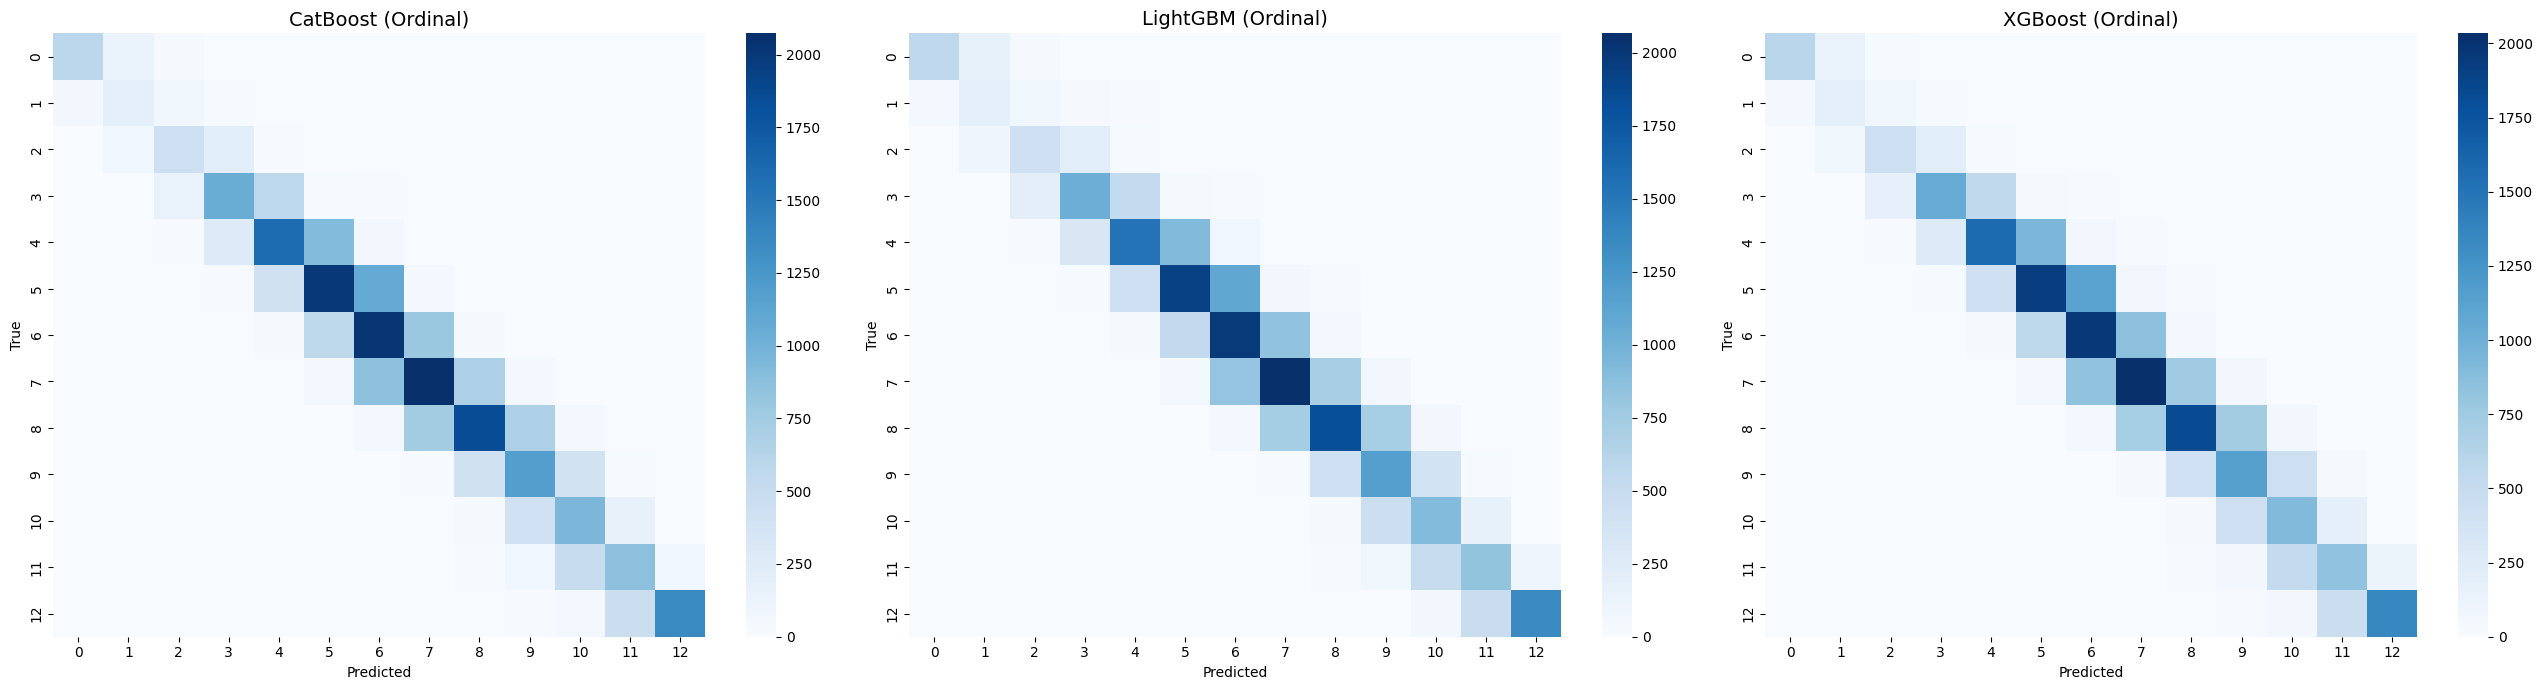

In [136]:
model_preds = {
    "CatBoost (Ordinal)": y_pred_cat,
    "LightGBM (Ordinal)": y_pred_lgb,
    "XGBoost (Ordinal)":  y_pred_xgb
}

fig, axes = plt.subplots(1, 3, figsize=(26, 7))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_tree_test, preds)
    sns.heatmap(cm, cmap="Blues", annot=False, ax=ax)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()